# Imports and preliminaries

In [9]:
import sklearn, ast, json, itertools, math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection, metrics
from sklearn.svm import SVC
from scipy.stats import pearsonr, spearmanr, f_oneway, kruskal
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectFromModel

# Cleaning: 

In [10]:
#read in dataset
# data_df = pd.read_pickle('data_multiprocess.pkl')
# d_sem_df = pd.read_pickle('d_sem_df.pkl')
# d_sem_df = pd.read_pickle('d_sem_df_1514777508.pkl')
# d_sem_df = pd.read_pickle('d_sem_df_50.pkl')
# d_sem_df = pd.read_pickle('d_sem_oov_1514777508.pkl')
d_sem_df = pd.read_pickle('d_sem_oov_full.pkl')
display(d_sem_df.head())


# data_df = pd.read_pickle('2013_17_data_df.pkl')
# print(data_df.shape)
# data_df = pd.read_pickle('six_month_data.pkl')

# data_df = pd.read_pickle('data_df_1514777508.pkl')
data_df = pd.read_pickle('data_df_full.pkl')
display(data_df.head())

#data_df = data_df.drop(columns=['d_s_25', 'd_s_50', 'd_s_75', 'd_s_mean'])
data_df = data_df.merge(d_sem_df[['word', 'd_s_75', 'd_s_85', 'd_s_95', 'd_s_mean']], how='inner', on='word')
display(data_df['source'].value_counts())
freq_df = pd.read_pickle('freq_df.pkl')

,Unnamed: 0,word,categories,source,pos,nuts_ent_label,conll_ent_label,d_s_85,d_s_75,d_s_95,d_s_mean
0,0,alarmed,NaN,bnc,vvd,NaN,NaN,"[(1356992928, 2.8256569652444192e-05), (137277...","[(1356992928, 2.8256569652444192e-05), (137277...","[(1356992928, 2.8256569652444192e-05), (137277...","[(1356992928, 0.26757783), (1372771386, 0.2806..."
1,1,scroll,NaN,bnc,nn1,NaN,NaN,"[(1356992928, 5.6513139304888384e-05), (137277...","[(1356992928, 0.00019779598756710935), (137277...","[(1356992928, 2.8256569652444192e-05), (137277...","[(1356992928, 0.16064824), (1372771386, 0.1684..."
2,3,flew,NaN,bnc,vvd,NaN,NaN,"[(1356992928, 2.8256569652444192e-05), (137277...","[(1356992928, 2.8256569652444192e-05), (137277...","[(1356992928, 2.8256569652444192e-05), (137277...","[(1356992928, 0.21724385), (1372771386, 0.2185..."
3,4,cuddles,NaN,bnc,nn2-vvz,NaN,NaN,"[(1356992928, nan), (1372771386, nan), (138854...","[(1356992928, nan), (1372771386, nan), (138854...","[(1356992928, nan), (1372771386, nan), (138854...","[(1356992928, nan), (1372771386, nan), (138854..."
4,5,affecting,NaN,bnc,aj0,NaN,NaN,"[(1356992928, 2.8256569652444192e-05), (137277...","[(1356992928, 8.476970895733258e-05), (1372771...","[(1356992928, 2.8256569652444192e-05), (137277...","[(1356992928, 0.24832702), (1372771386, 0.2656..."


,Unnamed: 0,word,categories,source,pos,nuts_ent_label,conll_ent_label,freq,rel_freq,d_u,d_t,d_l
0,0,alarmed,NaN,bnc,vvd,NaN,NaN,"[(1356992928, 10), (1372771386, 9), (138854984...","[(1356992928, 8.510507199846538e-07), (1372771...","[(1356992928, 0.9058520868923265), (1372771386...","[(1356992928, 0.984442578286874), (1372771386,...","[(1356992928, 0.05625981486145948), (137277138..."
1,1,scroll,NaN,bnc,nn1,NaN,NaN,"[(1356992928, 587), (1372771386, 727), (138854...","[(1356992928, 4.995667726309918e-05), (1372771...","[(1356992928, 0.7192234972816103), (1372771386...","[(1356992928, 0.7077879180358885), (1372771386...","[(1356992928, -0.17883686237647645), (13727713..."
2,3,flew,NaN,bnc,vvd,NaN,NaN,"[(1356992928, 101), (1372771386, 83), (1388549...","[(1356992928, 8.595612271845003e-06), (1372771...","[(1356992928, 0.9624986880992001), (1372771386...","[(1356992928, 0.9375899096222732), (1372771386...","[(1356992928, 0.09524980247512893), (137277138..."
3,4,cuddles,NaN,bnc,nn2-vvz,NaN,NaN,"[(1356992928, nan), (1372771386, nan), (138854...","[(1356992928, nan), (1372771386, nan), (138854...","[(1356992928, nan), (1372771386, nan), (138854...","[(1356992928, nan), (1372771386, nan), (138854...","[(1356992928, nan), (1372771386, nan), (138854..."
4,5,affecting,NaN,bnc,aj0,NaN,NaN,"[(1356992928, 71), (1372771386, 73), (13885498...","[(1356992928, 6.042460111891042e-06), (1372771...","[(1356992928, 0.879104901732337), (1372771386,...","[(1356992928, 0.9441224617017528), (1372771386...","[(1356992928, 0.05844345327555622), (137277138..."


bnc          3246
conll         861
nuts          745
wikipedia     533
Name: source, dtype: int64

In [11]:
# data_df['d_s_mean'] = data_df['d_s_mean'].map(lambda x: pd.Series(x).fillna(method='bfill').tolist())
# data_df['d_s_95'] = data_df['d_s_95'].map(lambda x: pd.Series(x).fillna(method='bfill').tolist())

In [12]:
if 'no_values' not in data_df.columns: 
    data_df['no_values'] = data_df['freq'].map(lambda x: all(np.isnan(y[1]) for y in x))
    display(data_df['no_values'].value_counts())
    data_df = data_df[data_df['no_values'] == False]

False    5385
Name: no_values, dtype: int64

In [13]:
if 'no_values' not in freq_df.columns: 
    freq_df['no_values'] = freq_df['freq'].map(lambda x: all(np.isnan(y[1]) for y in x))
    display(freq_df['no_values'].value_counts())
    display(freq_df['source'].value_counts())
    freq_df = freq_df[freq_df['no_values'] == False]
    display(freq_df['source'].value_counts())

True     8366
False    5385
Name: no_values, dtype: int64

wikipedia    4834
bnc          4803
conll        2882
nuts         1232
Name: source, dtype: int64

bnc          3246
conll         861
nuts          745
wikipedia     533
Name: source, dtype: int64

In [14]:
#manually create list of named entities to exclude
# urban_df = data_df[data_df['source'] == 'urban']
# urban_df.to_csv('urban_filtered.csv')
# drop_set = {'isopropyl', 'jetta', 'gsx', 'fisheye', 'sasquatch', 'exxonmobil', 'mage', 'dsm', 'dmv', '56k', 'camaro', 'mpv', 'carb', 'falken', 'spyder', 'headshot', 'offroad', 'u2', '3d', 'ihop', 'm5', 'tristar', 'shellshock', 'riaa', 'fph', 'conco', 'tupac', 'diggory', 'x7', 'tls', 'vk', 'ihs', 'nitro', 'snl', 'moby', 'roc', 'kardon', 'rosey', 'gq', 'suv', 'appleworks', 'pmd', 'rmp', 'csi', 'username', 'sith', 'pennywise', 'tintin', 'speedo', '4g63', 'miata', 'nsx', 'grc', 'bittorrent', 'anakin', 'cgi', '2d', 'nwa', 'rit', 'moto', 'kuo', 'amd', 'baz', 'realplayer', 'warcraft', 'l7', 'lysander', 'cornhole', 'dunlop', 'rammstein', 'bono', 'squidward', 'pikachu', 'banff', 'bic', 'capcom', 'doritos', 'firebird', 'mcdonalds', 'acura', 'prada', 'hemi', 'voip', 'moab', 'fleetwood', 'greenlight', 'deadpool', '4x4', 'arya', 'raygun', 'goku', 'keanu', 'nilay', 'rsa', 'toole', 'goode', 'sams', 'wolfson', '300zx', 'shrek', 'odb', 'nhs', 'woolworths', 'gts', 'radiohead', 'jit', 'rx7', 'espn', 'ip', 'heil', 'netbsd', 'sergey', 'wma', 'nutella', 'pharrell', 'ramen', 'borat', 'smarties', 'shawarma', 'tycho', 'anime', 'apd', 'bmx', '3am', 'techno', 'emo', 'copywrite', 'nas', 'coldplay', 'acdc'}
# data_df['urban_drop'] = data_df['word'].map(lambda x: x in drop_set)
# print(data_df['urban_drop'].value_counts())
# data_df = data_df[data_df['urban_drop'] == False]

In [15]:
#replace nan with empty string for lambda expressions below
data_df['categories'] = data_df['categories'].fillna(value='')
data_df['categories'] = data_df['categories'].map(lambda x: str.lower(x))
data_df['pos'] = data_df['pos'].fillna(value='')

#add pos tags
data_df['is_noun'] = data_df.apply(lambda x: 'nn' in x['pos'] or 'noun' in x['categories'] or x['source'] == 'conll' or x['source'] == 'nuts', axis=1)
data_df['is_adj'] =  data_df.apply(lambda x: 'aj' in x['pos'] or 'adjective' in x['categories'], axis=1)
data_df['is_adv'] =  data_df.apply(lambda x: 'av' in x['pos'] or 'adverb' in x['categories'], axis=1)
data_df['is_verb'] =  data_df.apply(lambda x: 'vv' in x['pos'] or 'verb' in x['categories'] and 'adverb' not in x['categories'], axis=1)
data_df['is_int'] =  data_df.apply(lambda x: 'itj' in x['pos'] or 'interjection' in x['categories'], axis=1)

display(data_df.head())

,Unnamed: 0,word,categories,source,pos,nuts_ent_label,conll_ent_label,freq,rel_freq,d_u,...,d_s_75,d_s_85,d_s_95,d_s_mean,no_values,is_noun,is_adj,is_adv,is_verb,is_int
0,0,alarmed,,bnc,vvd,NaN,NaN,"[(1356992928, 10), (1372771386, 9), (138854984...","[(1356992928, 8.510507199846538e-07), (1372771...","[(1356992928, 0.9058520868923265), (1372771386...",...,"[(1356992928, 2.8256569652444192e-05), (137277...","[(1356992928, 2.8256569652444192e-05), (137277...","[(1356992928, 2.8256569652444192e-05), (137277...","[(1356992928, 0.26757783), (1372771386, 0.2806...",False,False,False,False,True,False
1,1,scroll,,bnc,nn1,NaN,NaN,"[(1356992928, 587), (1372771386, 727), (138854...","[(1356992928, 4.995667726309918e-05), (1372771...","[(1356992928, 0.7192234972816103), (1372771386...",...,"[(1356992928, 0.00019779598756710935), (137277...","[(1356992928, 5.6513139304888384e-05), (137277...","[(1356992928, 2.8256569652444192e-05), (137277...","[(1356992928, 0.16064824), (1372771386, 0.1684...",False,True,False,False,False,False
2,3,flew,,bnc,vvd,NaN,NaN,"[(1356992928, 101), (1372771386, 83), (1388549...","[(1356992928, 8.595612271845003e-06), (1372771...","[(1356992928, 0.9624986880992001), (1372771386...",...,"[(1356992928, 2.8256569652444192e-05), (137277...","[(1356992928, 2.8256569652444192e-05), (137277...","[(1356992928, 2.8256569652444192e-05), (137277...","[(1356992928, 0.21724385), (1372771386, 0.2185...",False,False,False,False,True,False
3,4,cuddles,,bnc,nn2-vvz,NaN,NaN,"[(1356992928, nan), (1372771386, nan), (138854...","[(1356992928, nan), (1372771386, nan), (138854...","[(1356992928, nan), (1372771386, nan), (138854...",...,"[(1356992928, nan), (1372771386, nan), (138854...","[(1356992928, nan), (1372771386, nan), (138854...","[(1356992928, nan), (1372771386, nan), (138854...","[(1356992928, nan), (1372771386, nan), (138854...",False,True,False,False,True,False
4,5,affecting,,bnc,aj0,NaN,NaN,"[(1356992928, 71), (1372771386, 73), (13885498...","[(1356992928, 6.042460111891042e-06), (1372771...","[(1356992928, 0.879104901732337), (1372771386,...",...,"[(1356992928, 8.476970895733258e-05), (1372771...","[(1356992928, 2.8256569652444192e-05), (137277...","[(1356992928, 2.8256569652444192e-05), (137277...","[(1356992928, 0.24832702), (1372771386, 0.2656...",False,False,True,False,False,False


In [16]:
#extract time steps and eliminate them from all other columns
data_df['time_steps'] = data_df['freq'].map(lambda x: [value[0] for value in x])

# time_cols = ['freq', 'rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_25', 'd_s_50', 'd_s_75', 'd_s_mean', 'rank', 'normed_rank']
time_cols = ['freq', 'rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_75', 'd_s_85', 'd_s_95', 'd_s_mean']
# time_cols = ['freq', 'rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_50', 'd_s_75', 'd_s_95', 'd_s_mean']

# time_cols = ['freq', 'rel_freq', 'd_l', 'd_u', 'd_t', 'rank', 'normed_rank']

for col in time_cols: 
    data_df[col] = data_df[col].map(lambda x: [value[1] for value in x])

display(data_df.head())

,Unnamed: 0,word,categories,source,pos,nuts_ent_label,conll_ent_label,freq,rel_freq,d_u,...,d_s_85,d_s_95,d_s_mean,no_values,is_noun,is_adj,is_adv,is_verb,is_int,time_steps
0,0,alarmed,,bnc,vvd,NaN,NaN,"[10, 9, 10, 14, 15, 22, 15, 26, 15, 27, 19, 27...","[8.510507199846538e-07, 6.523183684734822e-07,...","[0.9058520868923265, 1.0022801105167771, 1.001...",...,"[2.8256569652444192e-05, 2.6883165761600087e-0...","[2.8256569652444192e-05, 2.6883165761600087e-0...","[0.26757783, 0.2806705, 0.2644896, 0.27511942,...",False,False,False,False,True,False,"[1356992928, 1372771386, 1388549844, 140432830..."
1,1,scroll,,bnc,nn1,NaN,NaN,"[587, 727, 579, 830, 1063, 1104, 869, 1355, 93...","[4.995667726309918e-05, 5.269282820891351e-05,...","[0.7192234972816103, 0.8192899714805102, 0.670...",...,"[5.6513139304888384e-05, 5.3766331523200175e-0...","[2.8256569652444192e-05, 2.6883165761600087e-0...","[0.16064824, 0.16845576, 0.16009851, 0.1610234...",False,True,False,False,False,False,"[1356992928, 1372771386, 1388549844, 140432830..."
2,3,flew,,bnc,vvd,NaN,NaN,"[101, 83, 83, 135, 185, 163, 172, 225, 182, 23...","[8.595612271845003e-06, 6.015824953699892e-06,...","[0.9624986880992001, 0.9019958747908655, 0.963...",...,"[2.8256569652444192e-05, 2.6883165761600087e-0...","[2.8256569652444192e-05, 2.6883165761600087e-0...","[0.21724385, 0.2185138, 0.22248276, 0.2257754,...",False,False,False,False,True,False,"[1356992928, 1372771386, 1388549844, 140432830..."
3,4,cuddles,,bnc,nn2-vvz,NaN,NaN,"[nan, nan, nan, nan, 9, nan, nan, nan, nan, 10...","[nan, nan, nan, nan, 3.8417032165599264e-07, n...","[nan, nan, nan, nan, 0.5514052892443926, nan, ...",...,"[nan, nan, nan, nan, 4.319001446865485e-05, na...","[nan, nan, nan, nan, 2.1595007234327425e-05, n...","[nan, nan, nan, nan, 0.27375647, nan, nan, 0.3...",False,True,False,False,True,False,"[1356992928, 1372771386, 1388549844, 140432830..."
4,5,affecting,,bnc,aj0,NaN,NaN,"[71, 73, 80, 139, 138, 152, 141, 225, 173, 285...","[6.042460111891042e-06, 5.291026766507134e-06,...","[0.879104901732337, 0.921284566940915, 0.81458...",...,"[2.8256569652444192e-05, 2.6883165761600087e-0...","[2.8256569652444192e-05, 2.6883165761600087e-0...","[0.24832702, 0.26569006, 0.24735324, 0.2468118...",False,False,True,False,False,False,"[1356992928, 1372771386, 1388549844, 140432830..."


In [17]:
#add logs
data_df['log_freq'] = data_df['freq'].map(lambda x: [np.log(value) for value in x])
data_df['log_rel_freq'] = data_df['rel_freq'].map(lambda x: [np.log(value) for value in x])
# data_df['log_rank'] = data_df['rank'].map(lambda x: [np.log(value) for value in x])
# data_df['log_normed_rank'] = data_df['normed_rank'].map(lambda x: [np.log(value) for value in x])


#add diffs, np.nan added at the beginning to preserve lengths
data_df['log_freq_diff'] = data_df['log_freq'].map(lambda x: [np.nan] + np.diff(x).tolist())
data_df['log_rel_freq_diff'] = data_df['log_rel_freq'].map(lambda x: [np.nan] + np.diff(x).tolist())
data_df['freq_diff'] = data_df['freq'].map(lambda x: [np.nan] + np.diff(x).tolist())
# data_df['log_rank_diff'] = data_df['log_rank'].map(lambda x: [np.nan] + np.diff(x).tolist())
# data_df['log_normed_rank_diff'] = data_df['log_normed_rank'].map(lambda x: [np.nan] + np.diff(x).tolist())

display(data_df.head())

,Unnamed: 0,word,categories,source,pos,nuts_ent_label,conll_ent_label,freq,rel_freq,d_u,...,is_adj,is_adv,is_verb,is_int,time_steps,log_freq,log_rel_freq,log_freq_diff,log_rel_freq_diff,freq_diff
0,0,alarmed,,bnc,vvd,NaN,NaN,"[10, 9, 10, 14, 15, 22, 15, 26, 15, 27, 19, 27...","[8.510507199846538e-07, 6.523183684734822e-07,...","[0.9058520868923265, 1.0022801105167771, 1.001...",...,False,False,True,False,"[1356992928, 1372771386, 1388549844, 140432830...","[2.302585092994046, 2.1972245773362196, 2.3025...","[-13.976794109697071, -14.24273309899234, -14....","[nan, -0.10536051565782634, 0.1053605156578263...","[nan, -0.26593898929526993, 0.1378655719989776...","[nan, -1, 1, 4, 1, 7, -7, 11, -11, 12, -8, 8, -9]"
1,1,scroll,,bnc,nn1,NaN,NaN,"[587, 727, 579, 830, 1063, 1104, 869, 1355, 93...","[4.995667726309918e-05, 5.269282820891351e-05,...","[0.7192234972816103, 0.8192899714805102, 0.670...",...,False,False,False,False,"[1356992928, 1372771386, 1388549844, 140432830...","[6.375024819828097, 6.588926477533519, 6.36130...","[-9.904354382863021, -9.85103119879504, -10.04...","[nan, 0.21390165770542247, -0.2276239999605236...","[nan, 0.05332318406798109, -0.1951189436193736...","[nan, 140, -148, 251, 233, 41, -235, 486, -421..."
2,3,flew,,bnc,vvd,NaN,NaN,"[101, 83, 83, 135, 185, 163, 172, 225, 182, 23...","[8.595612271845003e-06, 6.015824953699892e-06,...","[0.9624986880992001, 0.9019958747908655, 0.963...",...,False,False,True,False,"[1356992928, 1372771386, 1388549844, 140432830...","[4.61512051684126, 4.418840607796598, 4.418840...","[-11.664258685849857, -12.02111706853196, -11....","[nan, -0.19627990904466142, 0.0, 0.48643417064...","[nan, -0.3568583826821037, 0.03250505634115086...","[nan, -18, 0, 52, 50, -22, 9, 53, -43, 48, -39..."
3,4,cuddles,,bnc,nn2-vvz,NaN,NaN,"[nan, nan, nan, nan, 9, nan, nan, nan, nan, 10...","[nan, nan, nan, nan, 3.8417032165599264e-07, n...","[nan, nan, nan, nan, 0.5514052892443926, nan, ...",...,False,False,True,False,"[1356992928, 1372771386, 1388549844, 140432830...","[nan, nan, nan, nan, 2.1972245773362196, nan, ...","[nan, nan, nan, nan, -14.772179836716978, nan,...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
4,5,affecting,,bnc,aj0,NaN,NaN,"[71, 73, 80, 139, 138, 152, 141, 225, 173, 285...","[6.042460111891042e-06, 5.291026766507134e-06,...","[0.879104901732337, 0.921284566940915, 0.81458...",...,True,False,False,False,"[1356992928, 1372771386, 1388549844, 140432830...","[4.2626798770413155, 4.290459441148391, 4.3820...","[-12.016699325649801, -12.149498235180168, -12...","[nan, 0.027779564107075494, 0.0915671935254902...","[nan, -0.13279890953036677, 0.1240722498666411...","[nan, 2, 7, 59, -1, 14, -11, 84, -52, 112, -49..."


In [18]:
# #filter to instances that have at least six time steps worth of data
# data_df['x_values'] = data_df['freq'].map(lambda x: len(x) - sum(math.isnan(y) for y in x))
# display(data_df['x_values'].value_counts())
# data_df = data_df[data_df['x_values'] >= 6]
# display(data_df.shape)

In [19]:
#filter to words where the spearman correlation coefficient is above the 75th percentile
data_df['spearman_corr'] = data_df.apply(lambda x: spearmanr(x['time_steps'], x['log_rel_freq'])[0], axis=1)

top_quintile = data_df['spearman_corr'].quantile(0.85)
print("Top quintile:", top_quintile)
bottom_quintile = data_df['spearman_corr'].quantile(0.15)
print("Bottom quintile:", bottom_quintile)

print("Shape before:", data_df.shape)
# uncomment line below to get this subset
# data_df = data_df[(data_df['spearman_corr'] >= top_quintile) | (data_df['spearman_corr'] <= bottom_quintile)]
# data_df = data_df[data_df['spearman_corr'] >= top_quintile]
print(data_df['source'].value_counts())
print(data_df.shape)

Top quintile: 0.45604395604395603
Bottom quintile: -0.7032967032967032
Shape before: (5385, 29)
bnc          3246
conll         861
nuts          745
wikipedia     533
Name: source, dtype: int64
(5385, 29)


In [20]:
#generate groups: 
bnc = data_df[data_df['source'] == 'bnc']
wnut = data_df[data_df['source'] == 'nuts']
conll = data_df[data_df['source'] == 'conll']
nes = data_df[(data_df['source'] == 'conll') | (data_df['source'] == 'nuts')]
urban = data_df[data_df['source'] == 'urban']
wiktionary = data_df[data_df['source'] == 'wikipedia']
nonstandard = data_df[(data_df['source'] == 'wiktionary') | (data_df['source'] == 'urban')]

In [21]:
display(data_df['source'].value_counts())
display(data_df[['word', 'source']])

nouns = data_df[data_df['is_noun'] == True]
adjs = data_df[data_df['is_adj'] == True]
advs = data_df[data_df['is_adv'] == True]
verbs = data_df[data_df['is_verb'] == True]
ints = data_df[data_df['is_int'] == True]

display(nouns['source'].value_counts())
display(adjs['source'].value_counts())
display(advs['source'].value_counts())
display(verbs['source'].value_counts())
display(ints['source'].value_counts())

bnc          3246
conll         861
nuts          745
wikipedia     533
Name: source, dtype: int64

,word,source
0,alarmed,bnc
1,scroll,bnc
2,flew,bnc
3,cuddles,bnc
4,affecting,bnc
5,overseeing,bnc
6,fancied,bnc
7,comps,bnc
8,sacked,bnc
9,sweat,bnc


bnc          1459
conll         861
nuts          745
wikipedia     420
Name: source, dtype: int64

bnc          654
wikipedia    153
Name: source, dtype: int64

bnc          66
wikipedia    47
Name: source, dtype: int64

bnc          1424
wikipedia     172
Name: source, dtype: int64

wikipedia    57
bnc           1
Name: source, dtype: int64

## D^L threshold plot: 

In [22]:
def D_LFilter(in_data, q_range, double_sided=True, coeff='pearson'): 
    d_l_df = pd.DataFrame()

    if double_sided: 
        #cut out the lower end so that values converge
        q_range = [x for x in q_range if x >= 0.50]
        for q in q_range: 
            corr_df = pd.DataFrame()
            top_quintile = in_data['spearman_corr'].quantile(q)
            bottom_quintile = in_data['spearman_corr'].quantile(1.0 - q)
            #uncomment line below to get this subset
            my_data = in_data[(in_data['spearman_corr'] >= top_quintile) | (in_data['spearman_corr'] <= bottom_quintile)]
            
            #get correlations with frequency change and 
            corr_df['log_rel_freq_diff'] = list(itertools.chain.from_iterable(my_data['log_rel_freq_diff'].tolist()))
            corr_df['d_l'] = list(itertools.chain.from_iterable(my_data['d_l'].tolist()))
            corr_df['log_rel_freq'] = list(itertools.chain.from_iterable(my_data['log_rel_freq'].tolist()))
            corr_df = corr_df.dropna()
            display(corr_df.shape)
            
            if coeff is 'pearson': 
                cur_line = {'Quantile cutoff': q, 'd_l_log_freq': pearsonr(corr_df['d_l'], corr_df['log_rel_freq'])[0], '$D^L$': pearsonr(corr_df['d_l'], corr_df['log_rel_freq_diff'])[0]}

            else: 
                cur_line = {'Quantile cutoff': q, 'd_l_log_freq': spearmanr(corr_df['d_l'], corr_df['log_rel_freq'])[0], '$D^L$': spearmanr(corr_df['d_l'], corr_df['log_rel_freq_diff'])[0]}
            
            d_l_df = d_l_df.append(cur_line, ignore_index=True)
            
    else: 
        for q in q_range: 
            corr_df = pd.DataFrame()
            top_quintile = in_data['spearman_corr'].quantile(q)
            print(top_quintile)
            #uncomment line below to get this subset
            my_data = in_data[in_data['spearman_corr'] > top_quintile]
            
            #get correlations with frequency change and 
            corr_df['log_rel_freq_diff'] = list(itertools.chain.from_iterable(my_data['log_rel_freq_diff'].tolist()))
            corr_df['d_l'] = list(itertools.chain.from_iterable(my_data['d_l'].tolist()))
            corr_df['log_rel_freq'] = list(itertools.chain.from_iterable(my_data['log_rel_freq'].tolist()))
            corr_df = corr_df.dropna()
            display(corr_df.shape)
            
            if coeff is 'pearson': 
                cur_line = {'Quantile cutoff': q, 'd_l_log_freq': pearsonr(corr_df['d_l'], corr_df['log_rel_freq'])[0], '$D^L$': pearsonr(corr_df['d_l'], corr_df['log_rel_freq_diff'])[0]}
            else: 
                cur_line = {'Quantile cutoff': q, 'd_l_log_freq': spearmanr(corr_df['d_l'], corr_df['log_rel_freq'])[0], '$D^L$': spearmanr(corr_df['d_l'], corr_df['log_rel_freq_diff'])[0]}
            
            d_l_df = d_l_df.append(cur_line, ignore_index=True)
            
    display(d_l_df)
    plt.figure(figsize=(8,4))
#     plt.rc('text', usetex=True)
    plt.rc('font', size=10)
    plt.xlabel('Quantile cutoff', fontsize=14)
    plt.ylabel(r'$\rho ( D^L, \Delta log_{10}f )$', fontsize=14)
    plt.plot(d_l_df['Quantile cutoff'], d_l_df['$D^L$'])
#     plt.plot(d_l_df['Quantile cutoff'], d_l_df['d_l_log_freq'])
    plt.savefig('d_l_quantile.png')
    plt.show()

    return d_l_df

Data_df shape: (5385, 29)


(32796, 3)

(29076, 3)

(25380, 3)

(21924, 3)

(18216, 3)

(14640, 3)

(11004, 3)

(7332, 3)

(3708, 3)

(36, 3)

,$D^L$,Quantile cutoff,d_l_log_freq
0,-0.075919,0.526316,-0.425893
1,-0.076866,0.578947,-0.424925
2,-0.077534,0.631579,-0.422310
3,-0.081615,0.684211,-0.411108
4,-0.087884,0.736842,-0.415003
5,-0.092978,0.789474,-0.427480
6,-0.103057,0.842105,-0.434594
7,-0.104869,0.894737,-0.441921
8,-0.099523,0.947368,-0.489270
9,0.039640,1.000000,-0.398647


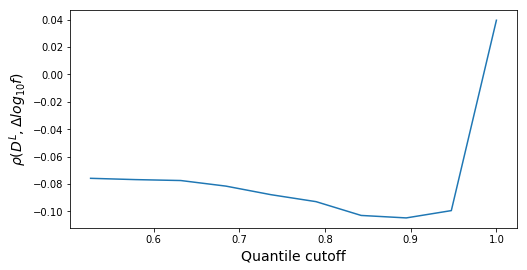

-1.0


(34392, 3)

-0.8461538461538461


(32520, 3)

-0.7692307692307693


(30744, 3)

-0.6978021978021978


(28932, 3)

-0.6208791208791209


(27060, 3)

-0.5384615384615384


(25272, 3)

-0.4505494505494505


(23472, 3)

-0.3522267206477736


(21732, 3)

-0.2747252747252747


(19848, 3)

-0.1868131868131868


(17928, 3)

-0.10989010989010989


(16212, 3)

-0.027472527472527472


(14388, 3)

0.054945054945054944


(12564, 3)

0.13186813186813187


(10800, 3)

0.23076923076923078


(9000, 3)

0.32967032967032966


(7212, 3)

0.4450549450549451


(5364, 3)

0.5604395604395606


(3540, 3)

0.7032967032967032


(1752, 3)

0.9945054945054945


(0, 3)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3033: RuntimeWarning: Mean of empty slice.
  mx = x.mean()
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3034: RuntimeWarning: Mean of empty slice.
  my = y.mean()
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


,$D^L$,Quantile cutoff,d_l_log_freq
0,-0.075904,0.000000,-0.420982
1,-0.075949,0.052632,-0.414401
2,-0.076179,0.105263,-0.412128
3,-0.076002,0.157895,-0.410419
4,-0.077896,0.210526,-0.417751
5,-0.078431,0.263158,-0.422263
6,-0.080972,0.315789,-0.420447
7,-0.083271,0.368421,-0.415043
8,-0.083066,0.421053,-0.411633
9,-0.084699,0.473684,-0.404256


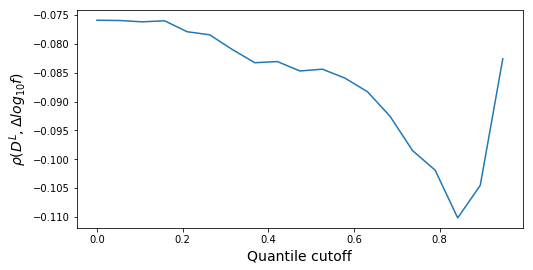

(1656, 3)

(1464, 3)

(1296, 3)

(1116, 3)

(924, 3)

(756, 3)

(552, 3)

(408, 3)

(204, 3)

(36, 3)

,$D^L$,Quantile cutoff,d_l_log_freq
0,-0.005728,0.526316,0.109725
1,-0.005675,0.578947,0.129648
2,-0.004632,0.631579,0.133469
3,0.006375,0.684211,0.131160
4,0.058273,0.736842,0.184508
5,0.074374,0.789474,0.112142
6,0.070534,0.842105,0.236393
7,0.139338,0.894737,0.280887
8,0.151040,0.947368,0.179315
9,0.039640,1.000000,-0.398647


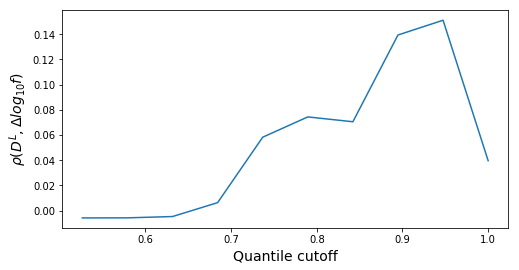

-1.0


(1728, 3)

-0.901098901098901


(1632, 3)

-0.8186813186813187


(1524, 3)

-0.7706766917293234


(1464, 3)

-0.6813186813186813


(1356, 3)

-0.6324465008675534


(1284, 3)

-0.5743204164256797


(1188, 3)

-0.5159051474840949


(1092, 3)

-0.4635627530364373


(1008, 3)

-0.4031231925968769


(912, 3)

-0.31000578368999426


(828, 3)

-0.2521688837478309


(732, 3)

-0.1336032388663968


(648, 3)

0.054945054945054944


(540, 3)

0.13736263736263735


(444, 3)

0.2498554077501448


(372, 3)

0.4265471370734525


(276, 3)

0.6550028918449969


(192, 3)

0.9222093695777904


(96, 3)

0.9945054945054945


(0, 3)

,$D^L$,Quantile cutoff,d_l_log_freq
0,-0.004193,0.000000,0.100780
1,0.003727,0.052632,0.089195
2,0.000688,0.105263,0.088811
3,-0.000651,0.157895,0.099442
4,-0.005417,0.210526,0.105224
5,-0.013486,0.263158,0.081753
6,-0.008733,0.315789,0.077422
7,-0.007323,0.368421,0.089174
8,-0.006579,0.421053,0.089609
9,-0.007882,0.473684,0.057074


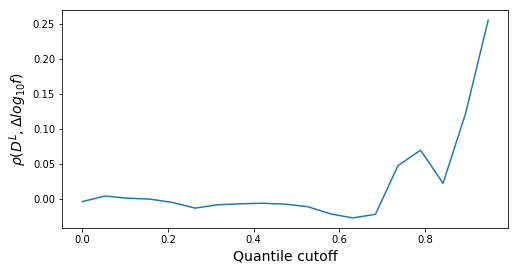

In [23]:
print("Data_df shape:", data_df.shape)
quantile_ranges = list(np.linspace(0.00, 1.00, 20))
d_l_double = D_LFilter(data_df, quantile_ranges, coeff='pearson')
d_l_single = D_LFilter(data_df, quantile_ranges, double_sided=False, coeff='pearson')

d_l_double_slang = D_LFilter(wiktionary, quantile_ranges, coeff='pearson')
d_l_single_slang = D_LFilter(wiktionary, quantile_ranges, double_sided=False, coeff='pearson')

## Extreme D^U and D^T correlations: 

In [24]:
# data_df['d_t_corr'] = data_df.apply(lambda x: pearsonr(x['d_t'][1:], x['log_rel_freq_diff'][1:])[0], axis=1)
# display(data_df.sort_values(by='d_t_corr').head(10))

# d_t_case = data_df.loc[4884]
# plt.plot(d_t_case['time_steps'], d_t_case['d_t'])
# plt.plot(d_t_case['time_steps'], d_t_case['log_rel_freq_diff'])

In [25]:
data_df['d_u_corr'] = data_df.apply(lambda x: spearmanr(x['d_u'][1:], x['log_rel_freq_diff'][1:])[0], axis=1)
display(data_df.sort_values(by='d_u_corr').head(10))

,Unnamed: 0,word,categories,source,pos,nuts_ent_label,conll_ent_label,freq,rel_freq,d_u,...,is_verb,is_int,time_steps,log_freq,log_rel_freq,log_freq_diff,log_rel_freq_diff,freq_diff,spearman_corr,d_u_corr
952,1412,tile,,bnc,vvi,NaN,NaN,"[40, 52, 52, 70, 45, 80, 69, 212, 82, 125, 128...","[3.4042028799386153e-06, 3.768950573402342e-06...","[0.9892446289265968, 0.8011408185043061, 0.818...",...,True,False,"[1356992928, 1372771386, 1388549844, 140432830...","[3.6888794541139363, 3.9512437185814275, 3.951...","[-12.59049974857718, -12.488713957747132, -12....","[nan, 0.2623642644674913, 0.0, 0.2972515234679...","[nan, 0.10178579083004813, 0.03250505634115086...","[nan, 12, 0, 18, -25, 35, -11, 143, -130, 43, ...",0.467033,-0.965035
2680,3945,rights,,bnc,nn2-vvz,NaN,NaN,"[307, 389, 425, 526, 957, 724, 995, 928, 778, ...","[2.6127257103528872e-05, 2.8194649481798287e-0...","[0.829508270497247, 0.7515570052332311, 0.7502...",...,True,False,"[1356992928, 1372771386, 1388549844, 140432830...","[5.726847747587197, 5.963579343618446, 6.05208...","[-10.552531455103919, -10.476378332710114, -10...","[nan, 0.23673159603124905, 0.08850982530597129...","[nan, 0.076153122393805, 0.12101488164712215, ...","[nan, 82, 36, 101, 431, -233, 271, -67, -150, ...",0.384615,-0.944056
1030,1524,regulator,,bnc,nn1-np0,NaN,NaN,"[19, 23, 9, 13, 21, 28, 30, 25, 60, 34, 25, 44...","[1.6169963679708423e-06, 1.6670358305433435e-0...","[0.483453760732554, 0.8427949733870496, 1.0005...",...,False,False,"[1356992928, 1372771386, 1388549844, 140432830...","[2.9444389791664403, 3.1354942159291497, 2.197...","[-13.334940223524676, -13.30446346039941, -14....","[nan, 0.1910552367627094, -0.9382696385929301,...","[nan, 0.03047676312526626, -0.9057645822517788...","[nan, 4, -14, 4, 8, 7, 2, -5, 35, -26, -9, 19,...",0.010989,-0.923077
2810,4148,danish,,bnc,aj0,NaN,NaN,"[71, 70, 32, 60, 68, 38, 65, 97, 49, 43, 58, 7...","[6.042460111891042e-06, 5.073587310349306e-06,...","[0.6258034893687823, 0.8097469196978502, 0.865...",...,False,False,"[1356992928, 1372771386, 1388549844, 140432830...","[4.2626798770413155, 4.248495242049359, 3.4657...","[-12.016699325649801, -12.1914624342792, -12.9...","[nan, -0.014184634991956102, -0.78275933924963...","[nan, -0.17476310862939926, -0.750254282908480...","[nan, -1, -38, 28, 8, -30, 27, 32, -48, -6, 15...",-0.719780,-0.895105
3912,5914,disney,,nuts,,corporation,NaN,"[163, 163, 191, 238, 318, 319, 270, 332, 380, ...","[1.3872126735749859e-05, 1.1814210451241956e-0...","[0.7049427945336582, 0.8181079930913755, 0.668...",...,False,False,"[1356992928, 1372771386, 1388549844, 140432830...","[5.093750200806762, 5.093750200806762, 5.25227...","[-11.185629001884354, -11.346207475521798, -11...","[nan, 0.0, 0.15852322723986756, 0.219997245624...","[nan, -0.16057847363744315, 0.1910282835810193...","[nan, 0, 28, 47, 80, 1, -49, 62, 48, 221, -21,...",0.604396,-0.895105
1179,1739,marble,,bnc,nn1-np0,NaN,NaN,"[19, 12, 25, 30, 36, 25, 17, 38, 42, 30, 46, 4...","[1.6169963679708423e-06, 8.697578246313097e-07...","[0.9131904369392687, 0.9229055694724396, 0.733...",...,False,False,"[1356992928, 1372771386, 1388549844, 140432830...","[2.9444389791664403, 2.4849066497880004, 3.218...","[-13.334940223524676, -13.95505102654056, -13....","[nan, -0.4595323293784399, 0.7339691750802002,...","[nan, -0.6201108030158835, 0.766474231421352, ...","[nan, -7, 13, 5, 6, -11, -8, 21, 4, -12, 16, -...",-0.208791,-0.881119
3934,5947,eu,,nuts,,group,NaN,"[76, 126, 172, 280, 313, 319, 578, 1965, 403, ...","[6.467985471883369e-06, 9.132457158628751e-06,...","[0.8785805595362236, 0.6350157575201326, 0.613...",...,False,False,"[1356992928, 1372771386, 1388549844, 140432830...","[4.330733340286331, 4.836281906951478, 5.14749...","[-11.948645862404787, -11.603675769377082, -11...","[nan, 0.5055485666651469, 0.31121256986197476,...","[nan, 0.34497009302770465, 0.3437176262031265,...","[nan, 50, 46, 108, 33, 6, 259, 1387, -1562, 38...",0.851648,-0.860140
4115,6404,lens,,conll,

In [26]:
# #identify cases that have at least one non-null value for d^s: 
# data_df['has_d_s_25'] = data_df['d_s_25'].map(lambda x: not all([np.isnan(y) for y in x]))
# display(data_df['has_d_s_25'].value_counts())

#test to subset to cases that have d_s_25: 
# data_df = data_df[data_df['has_d_s_25'] == True]

# Summary statistics: 

## Correlation matrices: 

In [27]:
# columns = ['freq', 'rel_freq', 'd_u', 'd_t', 'd_l', 'd_s_25',
#        'd_s_50', 'd_s_75', 'd_s_mean', 'log_freq',
#        'log_rel_freq', 'rank', 'normed_rank', 'log_freq_diff', 'log_rel_freq_diff']
# columns = ['freq', 'rel_freq', 'd_u', 'd_t', 'd_l', 'log_freq',
#        'log_rel_freq', 'rank', 'normed_rank', 'log_freq_diff', 'log_rel_freq_diff']
columns = ['d_u', 'd_t', 'd_l', 'd_s_mean', 'log_rel_freq','log_rel_freq_diff']
column_names = ['$D^U$', '$D^T$', '$D^L$', '$D^{Sem}$', '$log_{10}f$', '$\Delta log_{10}f$']
# columns = ['d_u', 'd_t', 'd_l', 'log_rel_freq', 'log_rel_freq_diff']
# column_names = ['$D^U$', '$D^T$', '$D^L$', '$log_{10}f$', '$\Delta log_{10}f$']

In [28]:
def CorrMatrix(in_df, title, cols, col_names, coeff='pearson', sig=False): 
    corr_df = pd.DataFrame()
    
    for col in cols: 
        all_vals = list(itertools.chain.from_iterable(in_df[col].tolist()))
        corr_df[col] = all_vals
    corr_df = corr_df.dropna()
    
    corr_df.columns = col_names

    
    if sig: 
        corr = corr_df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(len(corr_df.columns)) 
    
    else: 
        corr = corr_df.corr(coeff)

    
    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(corr, annot=True, linewidths=.5)
    ax.set_title(title)
    plt.savefig('%s_%s_%s_matrix.png' %(title.split()[0].lower(), title.split()[1].lower(),  coeff))
    plt.show()


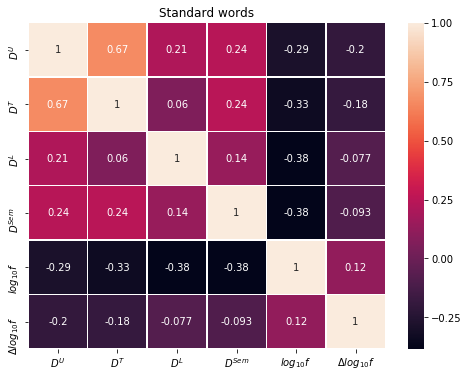

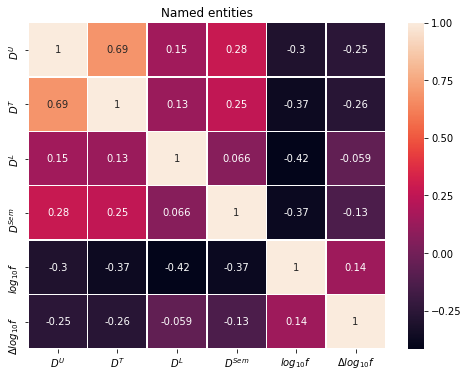

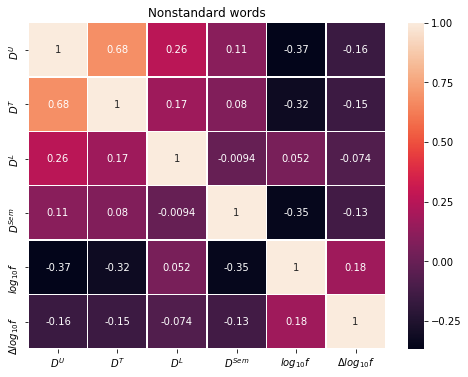

In [36]:
#plots for the actual paper: 
CorrMatrix(bnc, 'Standard words', columns, column_names)
CorrMatrix(nes, 'Named entities', columns, column_names)
CorrMatrix(wiktionary, 'Nonstandard words', columns, column_names)

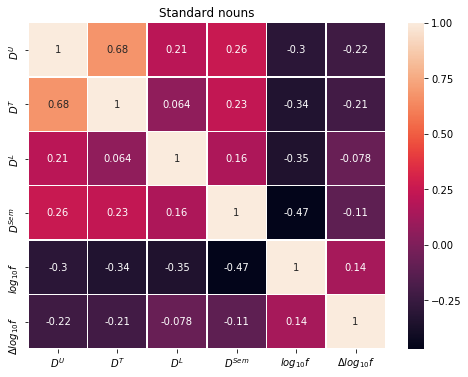

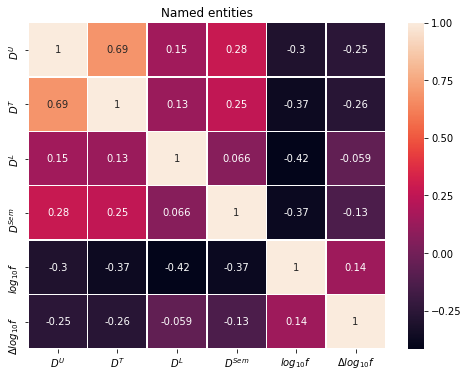

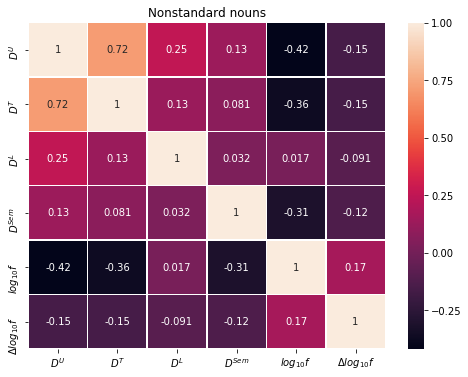

In [38]:
#nouns
CorrMatrix(bnc[bnc['is_noun'] == True], 'Standard nouns', columns, column_names)
CorrMatrix(nes[nes['is_noun'] == True], 'Named entities', columns, column_names)
CorrMatrix(wiktionary[wiktionary['is_noun'] == True], 'Nonstandard nouns', columns, column_names)

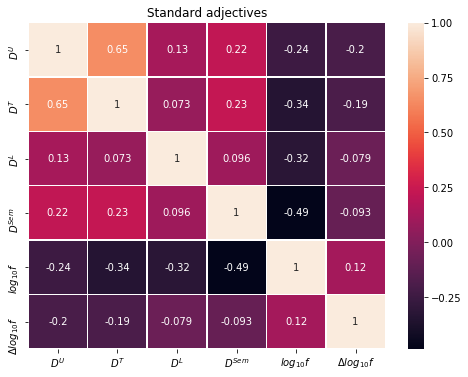

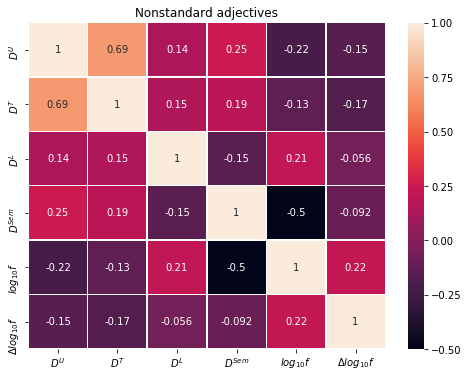

In [40]:
#adjectives
CorrMatrix(bnc[bnc['is_adj'] == True], 'Standard adjectives', columns, column_names)
CorrMatrix(wiktionary[wiktionary['is_adj'] == True], 'Nonstandard adjectives', columns, column_names)

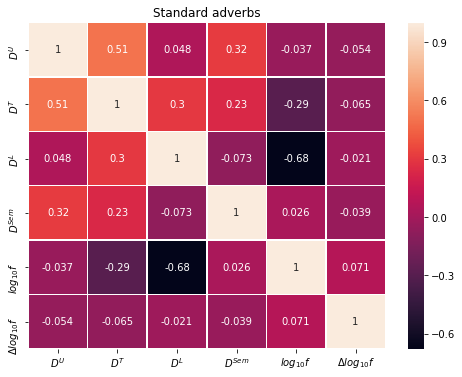

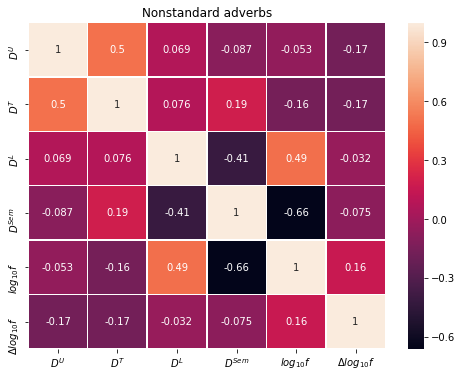

In [42]:
#adverbs
CorrMatrix(bnc[bnc['is_adv'] == True], 'Standard adverbs', columns, column_names)
CorrMatrix(wiktionary[wiktionary['is_adv'] == True], 'Nonstandard adverbs', columns, column_names)

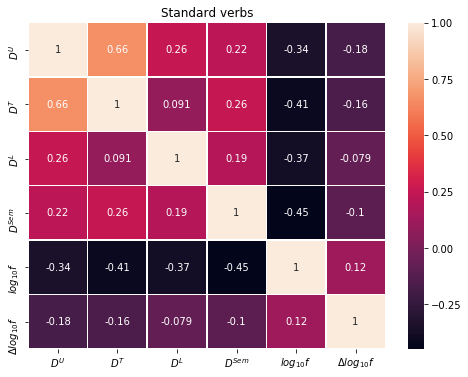

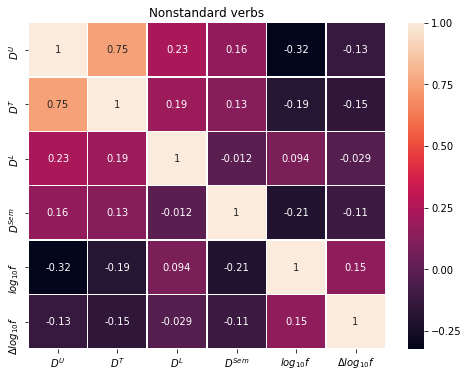

In [45]:
#verbs
CorrMatrix(bnc[bnc['is_verb'] == True], 'Standard verbs', columns, column_names)
CorrMatrix(wiktionary[wiktionary['is_verb'] == True], 'Nonstandard verbs', columns, column_names)

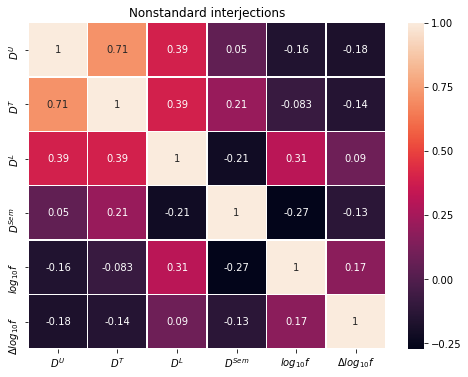

In [47]:
#int
CorrMatrix(wiktionary[wiktionary['is_int'] == True], 'Nonstandard interjections', columns, column_names)

## Relative importance regression setup: 

In [2643]:
#make relative importance dataframe: 
def RelaImpo(in_df, cols, name): 
    df = pd.DataFrame()
    
    for col in cols: 
        all_vals = list(itertools.chain.from_iterable(in_df[col].tolist()))
        df[col] = all_vals
    
    print(df.shape)
    display(df.head())
#     df = df.dropna()
#     display(df.head())
    df.to_csv(name)
    print(df.shape)
    return df

In [2644]:
dfs = [(bnc, 'bnc'), (nes, 'nes'), (wiktionary, 'wiktionary')]
for word_set in dfs: 
    rela_impo = RelaImpo(word_set[0], columns, '%s_rela_impo.csv' % word_set[1])

(42198, 6)


,d_u,d_t,d_l,d_s_mean,log_rel_freq,log_rel_freq_diff
0,0.905852,0.984443,0.056260,0.267578,-13.976794,NaN
1,1.002280,0.985847,-0.072742,0.280670,-14.242733,-0.265939
2,1.001967,0.985715,-0.015260,0.264490,-14.104868,0.137866
3,0.854708,0.917462,-0.017590,0.275119,-14.180169,-0.075301
4,0.994989,0.988950,0.049132,0.293683,-14.261354,-0.081185


(42198, 6)
(20878, 6)


,d_u,d_t,d_l,d_s_mean,log_rel_freq,log_rel_freq_diff
0,0.869073,0.841261,-0.049517,0.211614,-9.819475,NaN
1,0.847991,0.854213,-0.073738,0.220766,-9.802700,0.016775
2,0.870678,0.854602,-0.031146,0.213980,-9.767577,0.035123
3,0.875115,0.882057,-0.005300,0.228351,-9.972283,-0.204706
4,0.784588,0.825541,-0.058772,0.230934,-9.788573,0.183710


(20878, 6)
(6929, 6)


,d_u,d_t,d_l,d_s_mean,log_rel_freq,log_rel_freq_diff
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,0.320698,NaN,NaN
4,0.991278,0.988819,0.078274,0.323205,-15.177645,NaN


(6929, 6)


## Extreme cases: 

In [2645]:
def ExtremeCorr(arr1, arr2): 
    arr1 = np.array(arr1)
    arr2 = np.array(arr2)
    nas = np.logical_or(np.isnan(arr1), np.isnan(arr2))
#     if all(nas == True): 
#         print(nas)
#         return None
    
    corr = pearsonr(arr1[~nas], arr2[~nas])
    return corr[0]

In [2646]:
#uncomment line below when you add d^s
print(ExtremeCorr(data_df.iloc[10]['log_rel_freq_diff'], data_df.iloc[10]['d_u']))

-0.38755701316570185


In [2647]:
def ExtremeCases(var, num_cases, in_df, sort): 
    in_df['correlation'] = in_df.apply(lambda x: ExtremeCorr(x['log_rel_freq_diff'], x[var]), axis=1)
    extreme_df = in_df[(in_df['correlation'] > -1.00000) & (in_df['correlation'] < 1.00000)]
    display(extreme_df.shape)
    extreme_df = extreme_df.sort_values(by='correlation', ascending=sort).iloc[:num_cases]
    return extreme_df

In [2648]:
# extreme_d_s_25 = ExtremeCases('d_s_25', 50, data_df, False)
# display(extreme_d_s_25)

In [2649]:
# extreme_d_s_25 = ExtremeCases('d_s_25', 50, data_df, True)
# display(extreme_d_s_25)

In [2650]:
# extreme_d_s_mean = ExtremeCases('d_s_mean', 200, data_df, False)
# display(extreme_d_s_mean[extreme_d_s_mean['source'] == 'urban'])

In [2651]:
# extreme_d_s_mean = ExtremeCases('d_s_mean', 200, data_df, True)
# display(extreme_d_s_mean[extreme_d_s_mean['source'] == 'urban'])

## Histograms: 

In [2652]:
# group_colors = [(bnc, 'yellow'), (nes, 'green'), (wiktionary, 'red')]
group_colors = [(bnc, 'yellow'), (wiktionary, 'red')]

In [2653]:
def DistPlot(title, my_groups, corr_cols, names=None): 
    corr_df = pd.DataFrame()

    for col in corr_cols: 
        for group in my_groups: 
            all_vals = itertools.chain.from_iterable(group[0][col].tolist())
            no_na = pd.Series(list(all_vals)).dropna()
            ax = sns.distplot(no_na, color=group[1])
            ax.set_title(str(names) + ": " + col)
        plt.show()

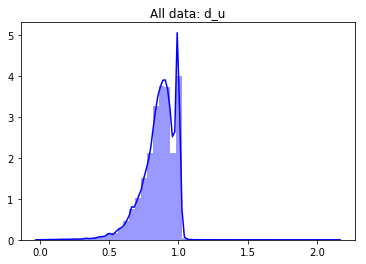

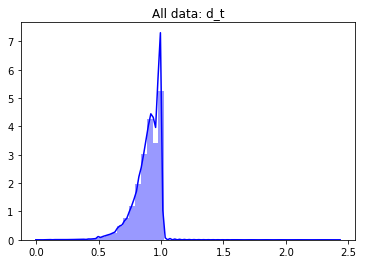

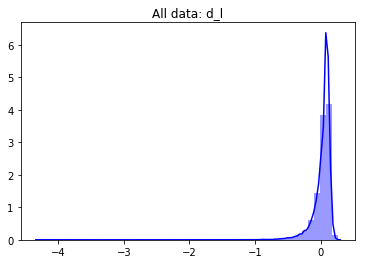

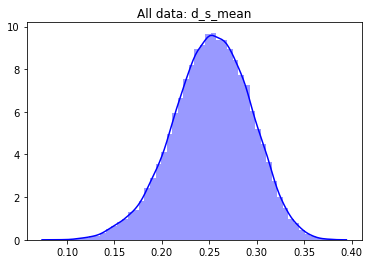

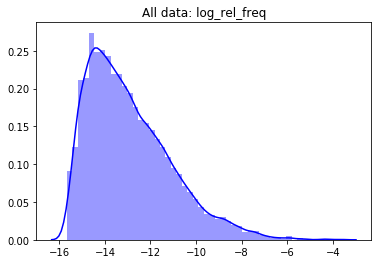

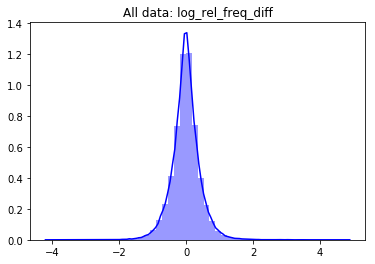

In [2654]:
DistPlot('All values', [(data_df, 'b')], columns, 'All data')

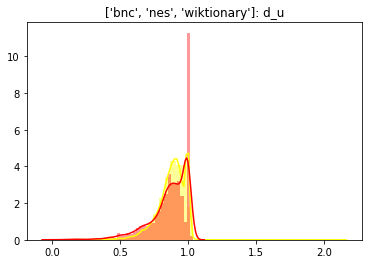

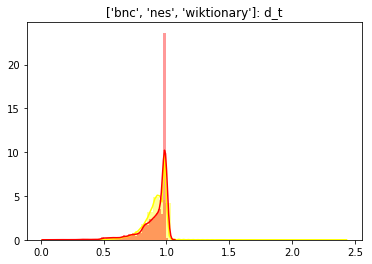

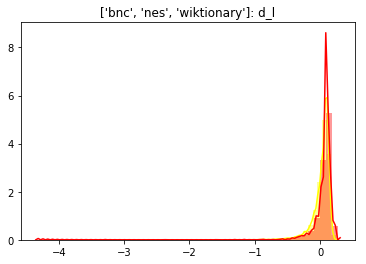

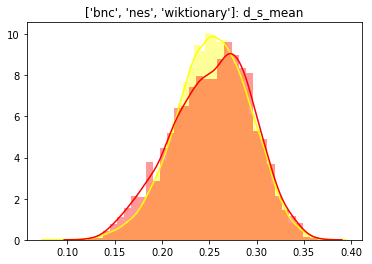

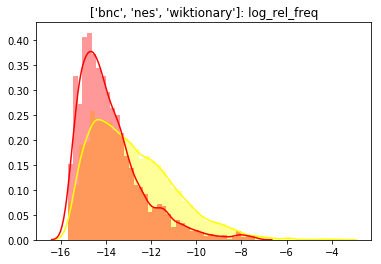

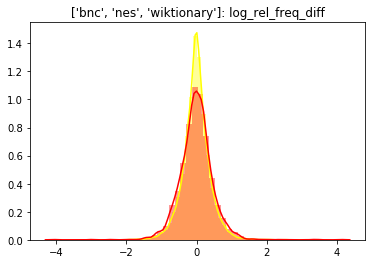

In [2655]:
#distplot by group of words
DistPlot('All values', group_colors, columns, ['bnc', 'nes', 'wiktionary'])

## Significance testing: 

In [2656]:
#kruskal-wallis: 
kruskal_cols = ['d_u', 'd_t', 'd_l', 'rel_freq', 'log_rel_freq', 'log_rel_freq_diff']

for col in kruskal_cols: 
    groups_data = [list(itertools.chain.from_iterable(group[0][col].tolist())) for group in group_colors]
    kruskal_result = kruskal(*groups_data, nan_policy='omit')
    print("%s f-statistic: %s" %(col, str(kruskal_result[0])))
    print("%s p-value: %s" %(col, str(kruskal_result[1])))

d_u f-statistic: 0.035946508893644605
d_u p-value: 0.8496259994999703
d_t f-statistic: 213.28526475598417
d_t p-value: 2.637181234031533e-48
d_l f-statistic: 522.6548851130384
d_l p-value: 1.1192813840458656e-115
rel_freq f-statistic: 1195.648926340719
rel_freq p-value: 5.381585542945077e-262
log_rel_freq f-statistic: 1195.648926340719
log_rel_freq p-value: 5.381585542945077e-262
log_rel_freq_diff f-statistic: 0.012833743276223141
log_rel_freq_diff p-value: 0.9098037270111017


## Time series plots of changes in metrics over each time step: 

In [2657]:
def TimeSeries(in_df, measure): 
    time_df = pd.DataFrame(columns=['time_steps', 'value'])

    time_df['time_steps'] = list(itertools.chain.from_iterable(in_df['time_steps'].tolist()))
    time_df['value'] = list(itertools.chain.from_iterable(in_df[measure].tolist()))
    
    ax = sns.lineplot(x='time_steps', y='value', data=time_df)
    ax.set_title(measure)
    plt.show()

freq


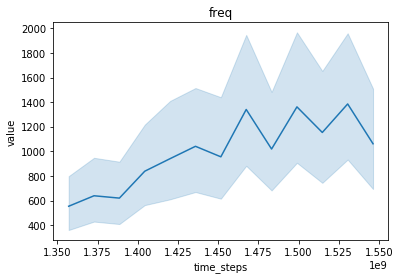

rel_freq


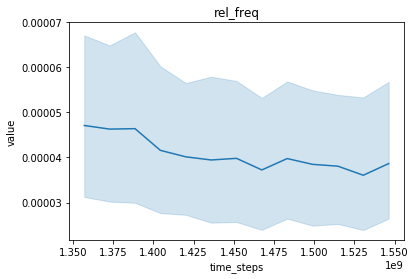

d_l


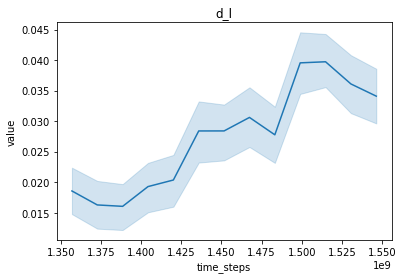

d_u


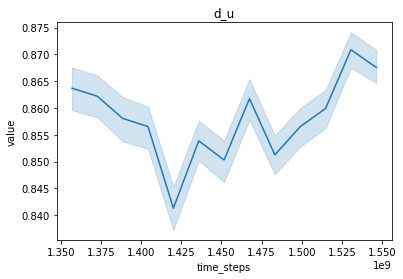

d_t


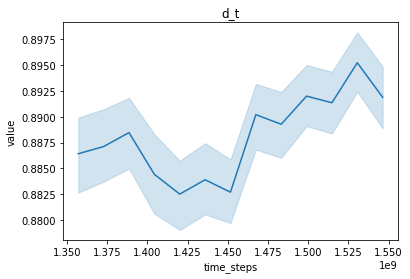

d_s_75


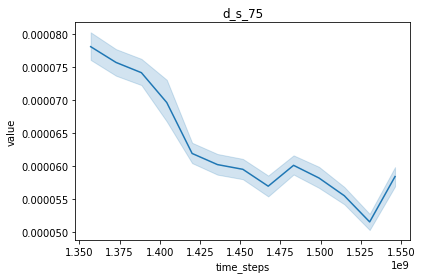

d_s_85


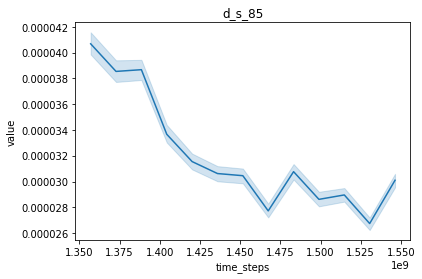

d_s_95


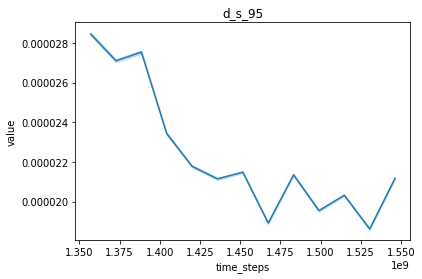

d_s_mean


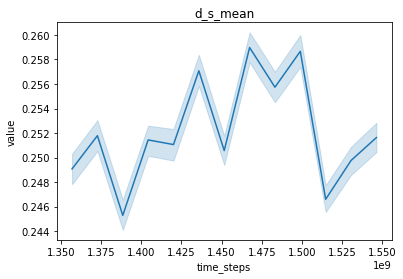

In [2658]:
#for all data
# time_cols = ['freq', 'rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_25', 'd_s_50', 'd_s_75', 'd_s_mean', 'log_freq', 'log_rel_freq', 'log_freq_diff', 'log_rel_freq_diff', 'freq_diff']

for col in time_cols: 
    print(col)
    TimeSeries(data_df, col)

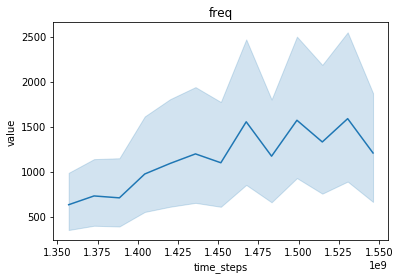

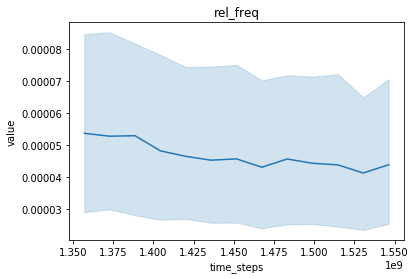

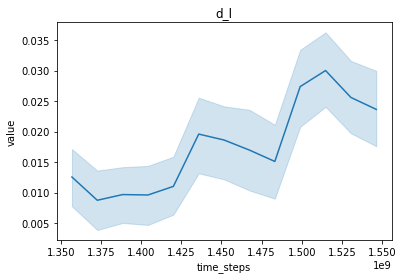

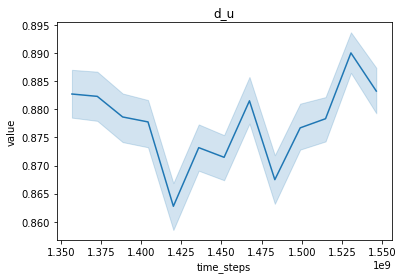

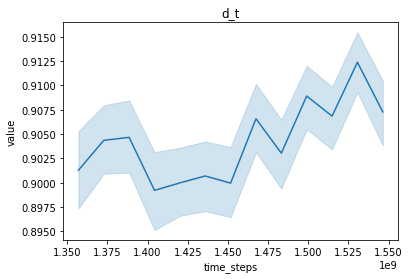

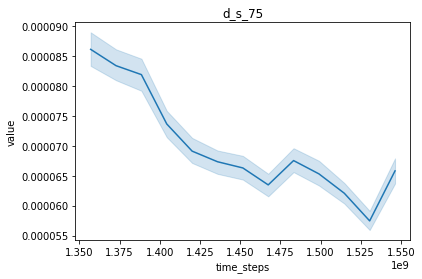

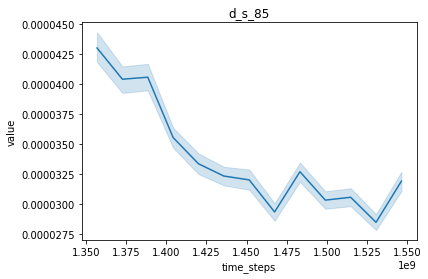

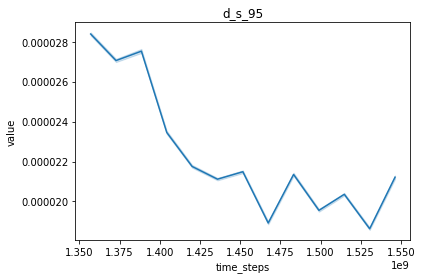

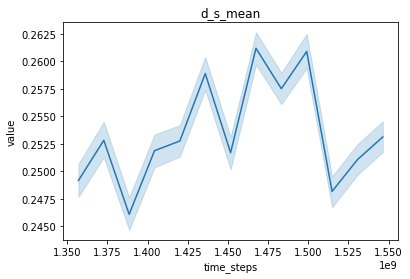

In [2659]:
for col in time_cols: 
    TimeSeries(bnc, col)

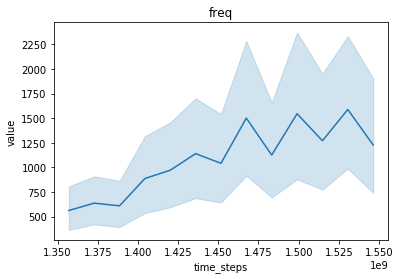

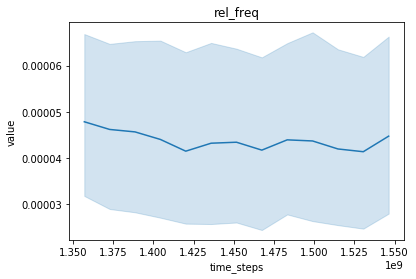

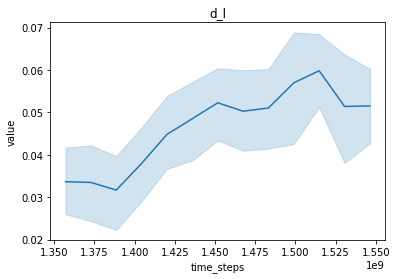

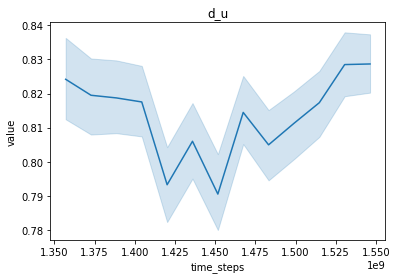

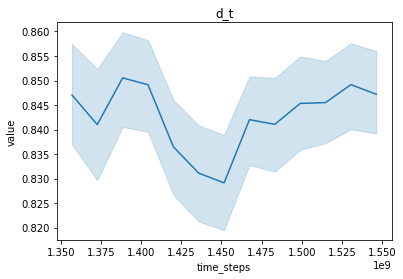

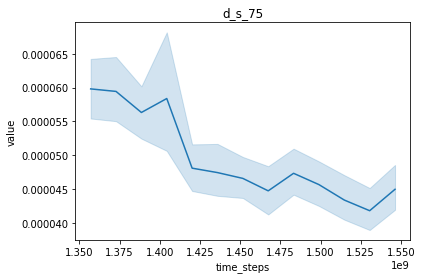

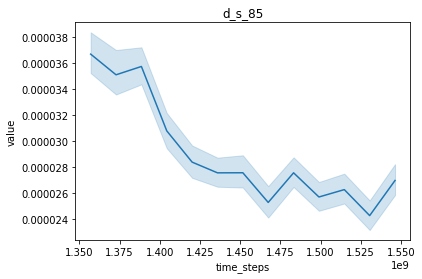

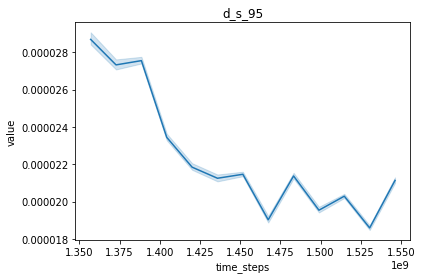

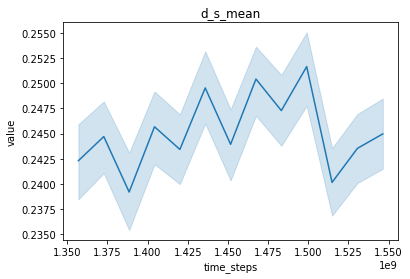

In [2660]:
for col in time_cols: 
    TimeSeries(wnut, col)

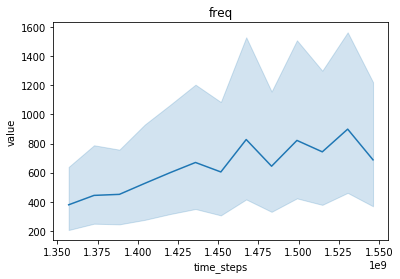

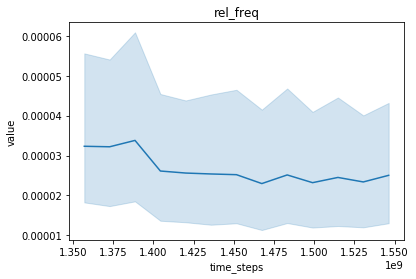

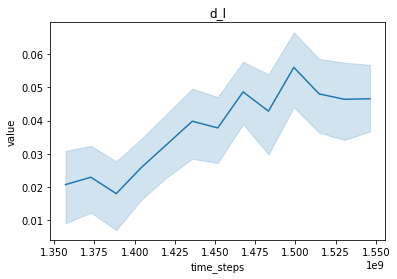

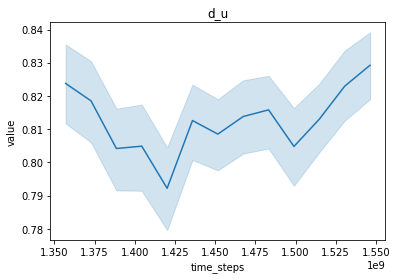

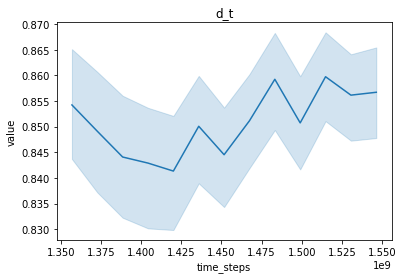

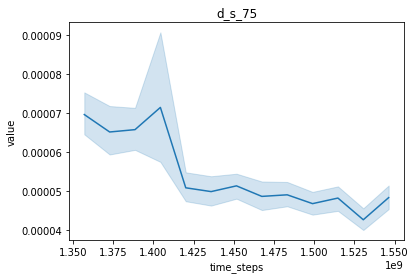

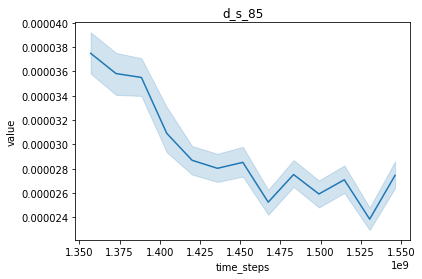

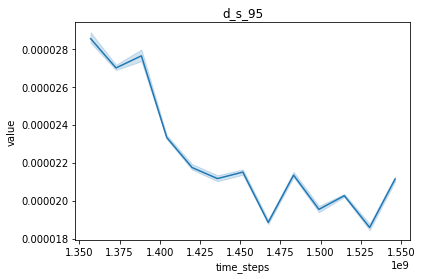

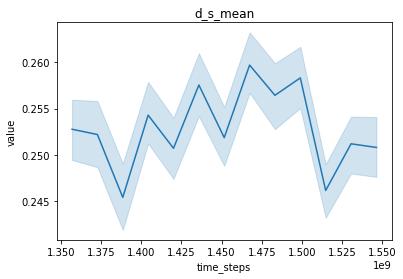

In [2661]:
for col in time_cols: 
    TimeSeries(conll, col)

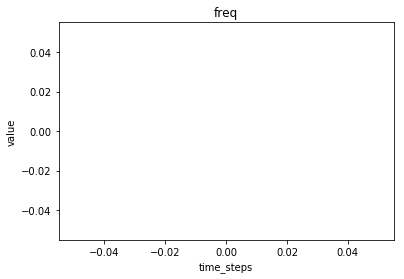

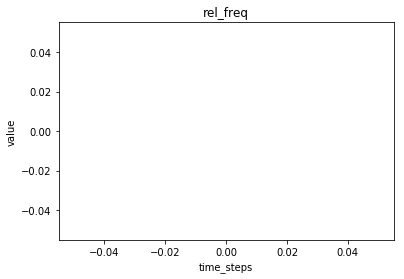

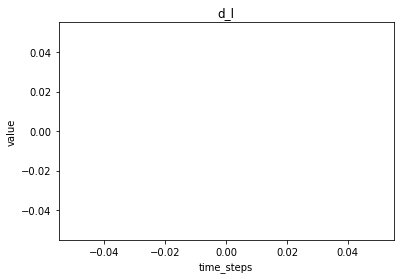

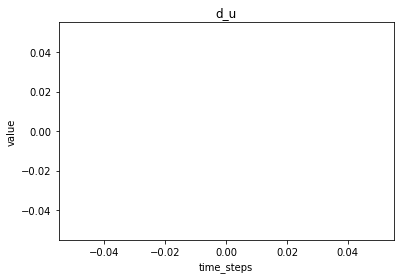

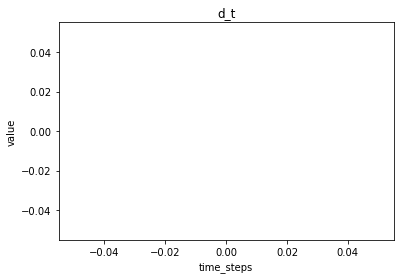

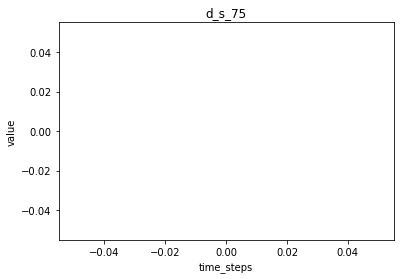

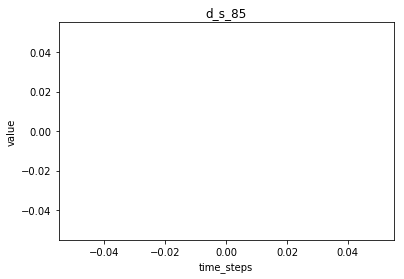

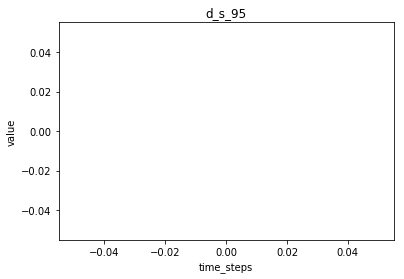

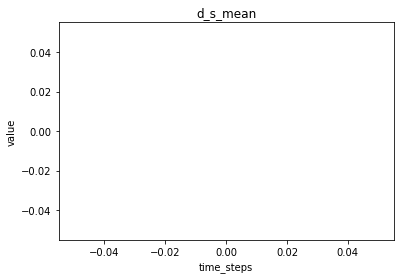

In [2662]:
for col in time_cols: 
    TimeSeries(urban, col)

# Predictive modeling: 

## Logistic regression: 

### Feature extraction: 

In [346]:
#generate growth/decline labels: 
def MakeData(df, time, lag=0, balanced=False, lag_check=False): 
#     df['label'] = df['log_rel_freq_diff'].map(lambda x: x[time] >= 0 if not math.isnan(x[time]) else np.nan)
    df['label'] = df['log_rel_freq'].map(lambda x: x[time+3] - x[time-1])
    df['label'] = df['label'].map(lambda x: x >= 0 if not math.isnan(x) else np.nan )

    df = df[(df['label'] == True) | (df['label'] == False)]
    df['label'] = df['label'].astype(int)
    
    if lag > 0: 
        if time - lag > 0: 
            df['lag'] = df['d_u'].map(lambda x: x[(time - lag):time])
        else: 
            df['lag'] = df['d_u'].map(lambda x: x[:time])
        
        if lag_check: 
            df['has_lag'] = df['lag'].map(lambda x: not(any(math.isnan(y) for y in x)))
            display(df['has_lag'].value_counts())
            df = df[df['has_lag'] == True]

    if balanced: 
        sample_size = df['label'].value_counts().min()
        df = df.groupby('label').apply(lambda x: x.sample(sample_size))
        display(df['label'].value_counts())
    return df

In [347]:
label_test = MakeData(data_df, 4, lag=3)
display(label_test.head())

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,Unnamed: 0,word,categories,source,pos,nuts_ent_label,conll_ent_label,freq,rel_freq,d_u,...,time_steps,log_freq,log_rel_freq,log_freq_diff,log_rel_freq_diff,freq_diff,spearman_corr,d_u_corr,label,lag
0,0,alarmed,,bnc,vvd,NaN,NaN,"[10, 9, 10, 14, 15, 22, 15, 26, 15, 27, 19, 27...","[8.510507199846538e-07, 6.523183684734822e-07,...","[0.9058520868923265, 1.0022801105167771, 1.001...",...,"[1356992928, 1372771386, 1388549844, 140432830...","[2.302585092994046, 2.1972245773362196, 2.3025...","[-13.976794109697071, -14.24273309899234, -14....","[nan, -0.10536051565782634, 0.1053605156578263...","[nan, -0.26593898929526993, 0.1378655719989776...","[nan, -1, 1, 4, 1, 7, -7, 11, -11, 12, -8, 8, -9]",-0.285714,-0.272727,1,"[1.0022801105167771, 1.0019665353692404, 0.854..."
1,1,scroll,,bnc,nn1,NaN,NaN,"[587, 727, 579, 830, 1063, 1104, 869, 1355, 93...","[4.995667726309918e-05, 5.269282820891351e-05,...","[0.7192234972816103, 0.8192899714805102, 0.670...",...,"[1356992928, 1372771386, 1388549844, 140432830...","[6.375024819828097, 6.588926477533519, 6.36130...","[-9.904354382863021, -9.85103119879504, -10.04...","[nan, 0.21390165770542247, -0.2276239999605236...","[nan, 0.05332318406798109, -0.1951189436193736...","[nan, 140, -148, 251, 233, 41, -235, 486, -421...",-0.857143,0.027972,0,"[0.8192899714805102, 0.6702950311326411, 0.800..."
2,3,flew,,bnc,vvd,NaN,NaN,"[101, 83, 83, 135, 185, 163, 172, 225, 182, 23...","[8.595612271845003e-06, 6.015824953699892e-06,...","[0.9624986880992001, 0.9019958747908655, 0.963...",...,"[1356992928, 1372771386, 1388549844, 140432830...","[4.61512051684126, 4.418840607796598, 4.418840...","[-11.664258685849857, -12.02111706853196, -11....","[nan, -0.19627990904466142, 0.0, 0.48643417064...","[nan, -0.3568583826821037, 0.03250505634115086...","[nan, -18, 0, 52, 50, -22, 9, 53, -43, 48, -39...",-0.032967,0.545455,0,"[0.9019958747908655, 0.9634565952365981, 0.908..."
4,5,affecting,,bnc,aj0,NaN,NaN,"[71, 73, 80, 139, 138, 152, 141, 225, 173, 285...","[6.042460111891042e-06, 5.291026766507134e-06,...","[0.879104901732337, 0.921284566940915, 0.81458...",...,"[1356992928, 1372771386, 1388549844, 140432830...","[4.2626798770413155, 4.290459441148391, 4.3820...","[-12.016699325649801, -12.149498235180168, -12...","[nan, 0.027779564107075494, 0.0915671935254902...","[nan, -0.13279890953036677, 0.1240722498666411...","[nan, 2, 7, 59, -1, 14, -11, 84, -52, 112, -49...",0.571429,-0.538462,0,"[0.921284566940915, 0.8145846133352904, 0.9282..."
5,6,overseeing,,bnc,nn1,NaN,NaN,"[nan, nan, 11, 11, 14, 12, 17, 19, 10, 16, 18,...","[nan, nan, 8.236193668553404e-07, 5.4562666586...","[nan, nan, 1.0033583774445176, 0.9953074742439...",...,"[1356992928, 1372771386, 1388549844, 140432830...","[nan, nan, 2.3978952727983707, 2.3978952727983...","[nan, nan, -14.009557347189038, -14.4213308572...","[nan, nan, nan, 0.0, 0.24116205681688774, -0.1...","[nan, nan, nan, -0.41177351003384643, 0.090983...","[nan, nan, nan, 0.0, 3.0, -2.0, 5.0, 2.0, -9.0...",NaN,NaN,0,"[nan, 1.0033583774445176, 0.9953074742439163]"


In [348]:
#make training data, cutoff-1 so that we don't get the information from the final step
pd.options.mode.use_inf_as_na = True

def ExpandData(in_df, cols, cutoff, lag=0): 
    expanded_list = []
    for col in cols: 
        if cutoff - lag > 0 and lag > 0: 
            array = in_df[col].apply(lambda x: [x[i] for i in range(cutoff - lag, cutoff)]).values
            array = np.array([[value for value in row] for row in array])
            array = pd.DataFrame(array, columns = [col + '_' + str(i) for i in range (cutoff - lag, cutoff)])
        
        else: 
            array = in_df[col].apply(lambda x: [x[i] for i in range(cutoff)]).values
            array = np.array([[value for value in row] for row in array])
            array = pd.DataFrame(array, columns = [col + '_' + str(i) for i in range (cutoff)])
        
        if col is 'log_rel_freq': 
            #fill with log of 
            #array = array.fillna(np.log(1.0))
            array = array.bfill(axis=1).ffill(axis=1).fillna(0)

        else: 
            #worst case: no values, so fill all with zero
            array = array.bfill(axis=1).ffill(axis=1).fillna(0)
        
        expanded_list.append(array)
        

    
    expanded_df = pd.concat(expanded_list, axis=1)
    
    #fill missing frequency values with 0
    return expanded_df

In [349]:
#sanity check
ExpandData(label_test, ['log_rel_freq', 'd_t'], 9)

,log_rel_freq_0,log_rel_freq_1,log_rel_freq_2,log_rel_freq_3,log_rel_freq_4,log_rel_freq_5,log_rel_freq_6,log_rel_freq_7,log_rel_freq_8,d_t_0,d_t_1,d_t_2,d_t_3,d_t_4,d_t_5,d_t_6,d_t_7,d_t_8
0,-13.976794,-14.242733,-14.104868,-14.180169,-14.261354,-13.997384,-14.285448,-14.140853,-14.350901,0.984443,0.985847,0.985715,0.917462,0.988950,0.944519,0.988950,0.991086,0.923383
1,-9.904354,-9.851031,-10.046150,-10.097800,-10.000554,-10.081731,-10.226155,-10.187392,-10.219475,0.707788,0.772284,0.798500,0.839253,0.780439,0.840169,0.807447,0.833602,0.860824
2,-11.664259,-12.021117,-11.988612,-11.913951,-11.749049,-11.994676,-11.846003,-11.982849,-11.854945,0.937590,0.915925,0.975268,0.924060,0.841353,0.900125,0.870264,0.927919,0.931520
3,-12.016699,-12.149498,-12.025426,-11.884752,-12.042151,-12.064546,-12.044738,-11.982849,-11.905660,0.944122,0.919492,0.950086,0.947391,0.954836,0.978169,0.948673,0.950013,0.979870
4,-14.009557,-14.009557,-14.009557,-14.421331,-14.330347,-14.603520,-14.160284,-14.454510,-14.756367,0.985735,0.985735,0.985735,0.987985,0.988936,0.989363,0.930805,0.938815,0.989275
5,-13.714430,-13.800900,-13.768395,-13.823494,-13.924882,-14.785841,-14.049059,-14.403217,-13.624964,0.984509,0.915521,0.985795,0.938731,0.989038,0.989336,0.989010,0.941439,0.957624
6,-13.714430,-14.137373,-14.873316,-14.873316,-13.952932,-13.952932,-14.796273,-14.565736,-14.565736,0.908777,0.788694,0.987918,0.987918,0.774399,0.774399,0.988859,0.990939,0.990939
7,-13.143885,-14.042062,-14.009557,-14.334319,-13.503669,-13.477509,-14.049059,-14.066745,-13.923457,0.727843,0.985887,0.627286,0.905669,0.896461,0.936199,0.936957,0.955721,0.989442
8,-11.813471,-12.109224,-11.763062,-11.725476,-11.617546,-11.815427,-12.051855,-11.225163,-10.956393,0.963452,0.948193,0.873622,0.899373,0.907166,0.895136,0.934203,0.787898,0.709799
9,-11.411845,-11.527303,-11.716105,-11.677563,-11.464073,-11.358327,-11.296404,-11.466704,-11.392525,0.918711,0.908381,0.924242,0.874791,0.899495,0.867454,0.856488,0.872201,0.872515


### Logistic regression: 

In [350]:
#fit logistic regression with cross-validation and print report: 
def Eval(my_X, my_y, classifier): 
    #fit and predict
    if classifier is 'logistic': 
        clf = LogisticRegression()
    if classifier is 'svm': 
        clf = SVC(kernel='rbf', C=100)
    if classifier is 'rf': 
        clf = RandomForestClassifier(n_estimators=100)
    if classifier is 'mlp': 
        clf = MLPClassifier(hidden_layer_sizes = (200,), activation='logistic', solver='lbfgs')
    if classifier is 'nb': 
        clf = GaussianNB()
        
    pred = model_selection.cross_val_predict(clf, my_X, my_y, n_jobs=-1, cv=10)
#     print(metrics.classification_report(my_y, pred))
    
    return (metrics.accuracy_score(my_y, pred), metrics.f1_score(my_y, pred, average='macro'))

In [351]:
def PlotPerformance(in_df, start, my_lag, my_clf, feature_sets, scaling=False, plt_name=None): 
    #get number of time steps: 
#     num_time_steps = len(in_df['time_steps'].iloc[0])
    num_time_steps = len(in_df['time_steps'].iloc[0]) - 3

    print(num_time_steps)
    performance_df = pd.DataFrame()
    #for each time step, predict based on previous label
    
    start = my_lag + 1
    
    for cur_lag in range(1, my_lag+1): 
        for i in range(start, num_time_steps): 
            for j, feature_set in enumerate(feature_sets): 
                labeled = MakeData(in_df, i, cur_lag, balanced=True, lag_check=False)
                X = ExpandData(labeled, feature_set[0], i, cur_lag)
                
                if scaling: 
                    scaler = StandardScaler()
                    scaler.fit(X)
                    X = scaler.transform(X)

                y = labeled['label']
                performance = Eval(X, y, my_clf)
                performance_df = performance_df.append({'feature_set': str(feature_set[0]), 'prediction_time_step': int(i), 'months_training': cur_lag, 'accuracy': performance[0], 'f1': performance[1]}, ignore_index=True)
    
    grouped = performance_df.groupby(['months_training', 'feature_set']).agg(['mean', 'sem'])
    
    display(grouped.head())
    figure, axis = plt.subplots(figsize=(15,7))
    
    x = grouped['accuracy']['mean'].unstack()
    print("Mean head")
    display(x.head())
    print("Standard deviation head")
    y = grouped['accuracy']['sem'].unstack()
    display(y.head())
    x.plot(ax=axis, yerr=y)
    plt.xlabel('Months of training', size=14)
    plt.ylabel('F1', fontsize=14)
#     plt.errorbar(x, y, xerr=grouped['accuracy']['std'].unstack())
    if plt_name is not None: 
        plt.savefig(plt_name)
    plt.show()
    return grouped
                

10


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


1    1925
0    1925
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


1    1925
0    1925
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


1    1879
0    1879
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


1    1879
0    1879
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


1    1925
0    1925
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


1    1925
0    1925
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


1    1879
0    1879
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


1    1879
0    1879
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


1    1925
0    1925
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


1    1925
0    1925
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


1    1879
0    1879
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


1    1879
0    1879
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


1    1925
0    1925
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


1    1925
0    1925
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


1    1879
0    1879
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


1    1879
0    1879
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


1    1925
0    1925
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


1    1925
0    1925
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


1    1879
0    1879
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


1    1879
0    1879
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


1    1925
0    1925
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


1    1925
0    1925
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


1    1879
0    1879
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


1    1879
0    1879
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


1    1925
0    1925
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


1    1925
0    1925
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


1    1879
0    1879
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


1    1879
0    1879
Name: label, dtype: int64

accuracy  \
                                                                       mean   
months_training feature_set                                                   
1.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.573782   
                ['log_rel_freq']                                   0.543800   
2.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.624415   
                ['log_rel_freq']                                   0.620072   
3.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.640538   

                                                                             \
                                                                        sem   
months_training feature_set                                                   
1.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.007257   
                ['log_rel_freq']                                   0.002501   
2.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.004936   
                ['log_rel_freq']                                   0.005383   
3.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.002357   

                                                                         f1  \
                                                                       mean   
months_training feature_set                                                   
1.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.572596   
                ['log_rel_freq']                                   0.541191   
2.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.624378   
                ['log_rel_freq']                                   0.619762   
3.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.640474   

                                                                             \
                                                                        sem   
months_training feature_set                                                   
1.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.007057   
                ['log_rel_freq']                                   0.002297   
2.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.004935   
                ['log_rel_freq']                                   0.005639   
3.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.002310   

                                                                  prediction_time_step  \
                                                                                  mean   
months_training feature_set                                                              
1.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']                  8.5   
                ['log_rel_freq']                                                   8.5   
2.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']                  8.5   
                ['log_rel_freq']                                                   8.5   
3.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']                  8.5   

                                                                        
                                                                   sem  
months_training feature_set                                             
1.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.5  
                ['log_rel_freq']                                   0.5  
2.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.5  
                ['log_rel_freq']                                   0.5  
3.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.5

Mean head


feature_set,"['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']",['log_rel_freq']
months_training,,
1.0,0.573782,0.543800
2.0,0.624415,0.620072
3.0,0.640538,0.635698
4.0,0.645939,0.637105
5.0,0.646440,0.637501


Standard deviation head


feature_set,"['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']",['log_rel_freq']
months_training,,
1.0,0.007257,0.002501
2.0,0.004936,0.005383
3.0,0.002357,0.004270
4.0,0.003342,0.001001
5.0,0.001245,0.001137


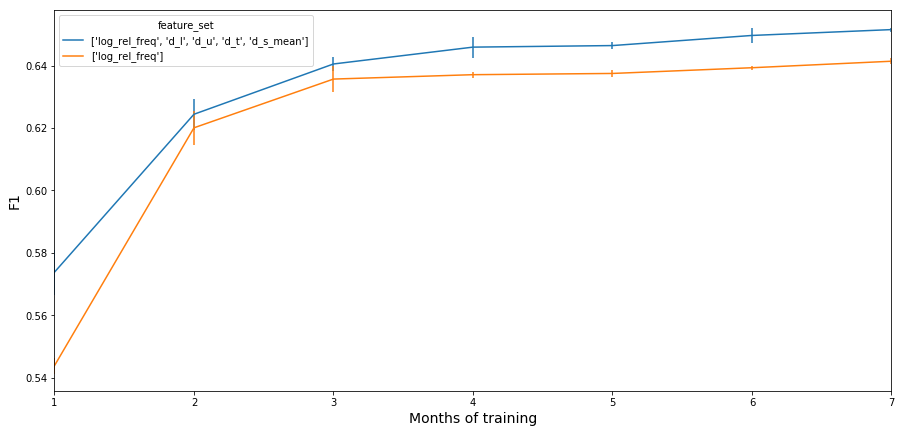

In [352]:
# f_sets = [(['log_rel_freq'], 'blue'), (['log_rel_freq', 'd_u'], 'orange'), (['log_rel_freq', 'd_t'], 'pink'), (['log_rel_freq', 'd_s_mean'], 'purple'), (['log_rel_freq', 'd_l'], 'brown'), (['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean'], 'green')]
f_sets = [(['log_rel_freq'], 'blue'), (['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean'], 'green')]

my_start = 7
lag_max = 7
clf_choice = 'logistic'

all_data_predict = PlotPerformance(data_df, my_start, lag_max, clf_choice, f_sets, plt_name='all_data_predict.png')

10


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    1289
0    1289
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    1289
0    1289
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    1225
0    1225
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    1225
0    1225
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    1289
0    1289
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    1289
0    1289
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    1225
0    1225
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    1225
0    1225
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    1289
0    1289
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    1289
0    1289
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    1225
0    1225
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    1225
0    1225
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    1289
0    1289
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    1289
0    1289
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    1225
0    1225
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    1225
0    1225
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    1289
0    1289
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    1289
0    1289
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    1225
0    1225
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    1225
0    1225
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    1289
0    1289
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    1289
0    1289
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    1225
0    1225
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    1225
0    1225
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    1289
0    1289
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    1289
0    1289
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    1225
0    1225
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    1225
0    1225
Name: label, dtype: int64

accuracy  \
                                                                       mean   
months_training feature_set                                                   
1.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.580505   
                ['log_rel_freq']                                   0.552520   
2.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.641414   
                ['log_rel_freq']                                   0.632779   
3.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.657915   

                                                                             \
                                                                        sem   
months_training feature_set                                                   
1.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.001729   
                ['log_rel_freq']                                   0.000541   
2.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.000219   
                ['log_rel_freq']                                   0.004772   
3.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.007799   

                                                                         f1  \
                                                                       mean   
months_training feature_set                                                   
1.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.579072   
                ['log_rel_freq']                                   0.550410   
2.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.641384   
                ['log_rel_freq']                                   0.632455   
3.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.657861   

                                                                             \
                                                                        sem   
months_training feature_set                                                   
1.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.001486   
                ['log_rel_freq']                                   0.000412   
2.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.000202   
                ['log_rel_freq']                                   0.004562   
3.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.007792   

                                                                  prediction_time_step  \
                                                                                  mean   
months_training feature_set                                                              
1.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']                  8.5   
                ['log_rel_freq']                                                   8.5   
2.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']                  8.5   
                ['log_rel_freq']                                                   8.5   
3.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']                  8.5   

                                                                        
                                                                   sem  
months_training feature_set                                             
1.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.5  
                ['log_rel_freq']                                   0.5  
2.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.5  
                ['log_rel_freq']                                   0.5  
3.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.5

Mean head


feature_set,"['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']",['log_rel_freq']
months_training,,
1.0,0.580505,0.552520
2.0,0.641414,0.632779
3.0,0.657915,0.652619
4.0,0.665652,0.656100
5.0,0.667428,0.657448


Standard deviation head


feature_set,"['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']",['log_rel_freq']
months_training,,
1.0,0.001729,0.000541
2.0,0.000219,0.004772
3.0,0.007799,0.002891
4.0,0.007001,0.000998
5.0,0.006450,0.002754


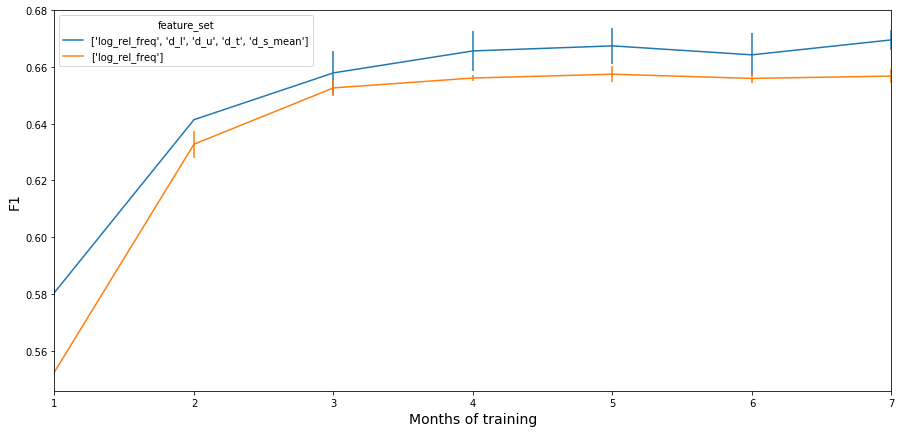

In [353]:
bnc_predict = PlotPerformance(bnc, my_start, lag_max, clf_choice, f_sets, plt_name='bnc_predict.png')

10


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    127
0    127
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    127
0    127
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    114
0    114
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    114
0    114
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    127
0    127
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    127
0    127
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    114
0    114
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    114
0    114
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    127
0    127
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    127
0    127
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    114
0    114
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    114
0    114
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    127
0    127
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    127
0    127
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    114
0    114
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    114
0    114
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    127
0    127
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    127
0    127
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    114
0    114
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    114
0    114
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    127
0    127
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    127
0    127
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    114
0    114
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    114
0    114
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    127
0    127
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    127
0    127
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    114
0    114
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    114
0    114
Name: label, dtype: int64

accuracy  \
                                                                       mean   
months_training feature_set                                                   
1.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.567033   
                ['log_rel_freq']                                   0.513106   
2.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.602345   
                ['log_rel_freq']                                   0.594022   
3.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.628557   

                                                                             \
                                                                        sem   
months_training feature_set                                                   
1.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.011915   
                ['log_rel_freq']                                   0.026264   
2.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.051164   
                ['log_rel_freq']                                   0.050715   
3.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.001364   

                                                                         f1  \
                                                                       mean   
months_training feature_set                                                   
1.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.562627   
                ['log_rel_freq']                                   0.506346   
2.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.602206   
                ['log_rel_freq']                                   0.593049   
3.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.628450   

                                                                             \
                                                                        sem   
months_training feature_set                                                   
1.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.014236   
                ['log_rel_freq']                                   0.020701   
2.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.051136   
                ['log_rel_freq']                                   0.051133   
3.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.001264   

                                                                  prediction_time_step  \
                                                                                  mean   
months_training feature_set                                                              
1.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']                  8.5   
                ['log_rel_freq']                                                   8.5   
2.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']                  8.5   
                ['log_rel_freq']                                                   8.5   
3.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']                  8.5   

                                                                        
                                                                   sem  
months_training feature_set                                             
1.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.5  
                ['log_rel_freq']                                   0.5  
2.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.5  
                ['log_rel_freq']                                   0.5  
3.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.5

Mean head


feature_set,"['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']",['log_rel_freq']
months_training,,
1.0,0.567033,0.513106
2.0,0.602345,0.594022
3.0,0.628557,0.614380
4.0,0.602967,0.611065
5.0,0.606506,0.603640


Standard deviation head


feature_set,"['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']",['log_rel_freq']
months_training,,
1.0,0.011915,0.026264
2.0,0.051164,0.050715
3.0,0.001364,0.043514
4.0,0.024226,0.020514
5.0,0.051388,0.036711


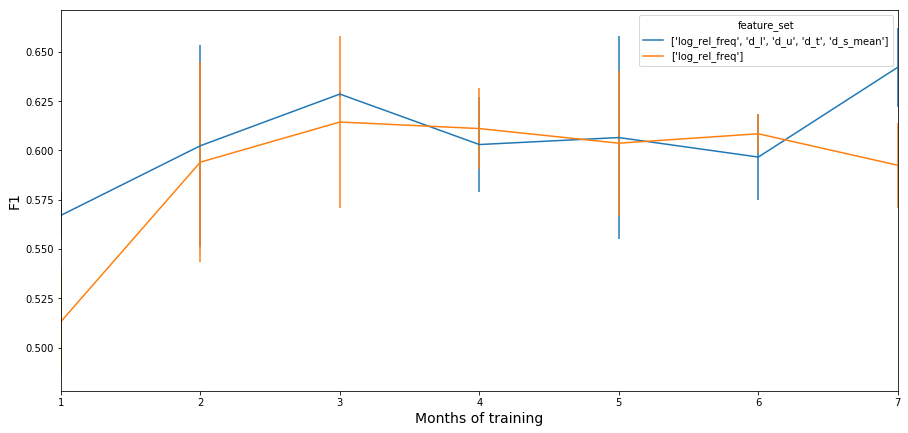

In [354]:
wiki_predict = PlotPerformance(wiktionary, my_start, lag_max, clf_choice, f_sets, plt_name='wiktionary_predict.png')

10


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    509
0    509
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    509
0    509
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    493
0    493
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    493
0    493
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    509
0    509
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    509
0    509
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    493
0    493
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    493
0    493
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    509
0    509
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    509
0    509
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    493
0    493
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    493
0    493
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    509
0    509
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    509
0    509
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    493
0    493
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    493
0    493
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    509
0    509
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    509
0    509
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    493
0    493
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    493
0    493
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    509
0    509
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    509
0    509
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    493
0    493
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    493
0    493
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    509
0    509
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    509
0    509
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    493
0    493
Name: label, dtype: int64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

1    493
0    493
Name: label, dtype: int64

accuracy  \
                                                                       mean   
months_training feature_set                                                   
1.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.550959   
                ['log_rel_freq']                                   0.535526   
2.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.593406   
                ['log_rel_freq']                                   0.601947   
3.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.616146   

                                                                             \
                                                                        sem   
months_training feature_set                                                   
1.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.003808   
                ['log_rel_freq']                                   0.006056   
2.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.025455   
                ['log_rel_freq']                                   0.021825   
3.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.007626   

                                                                         f1  \
                                                                       mean   
months_training feature_set                                                   
1.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.550410   
                ['log_rel_freq']                                   0.531357   
2.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.593371   
                ['log_rel_freq']                                   0.601517   
3.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.615929   

                                                                             \
                                                                        sem   
months_training feature_set                                                   
1.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.003795   
                ['log_rel_freq']                                   0.006021   
2.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.025484   
                ['log_rel_freq']                                   0.021644   
3.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.007683   

                                                                  prediction_time_step  \
                                                                                  mean   
months_training feature_set                                                              
1.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']                  8.5   
                ['log_rel_freq']                                                   8.5   
2.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']                  8.5   
                ['log_rel_freq']                                                   8.5   
3.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']                  8.5   

                                                                        
                                                                   sem  
months_training feature_set                                             
1.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.5  
                ['log_rel_freq']                                   0.5  
2.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.5  
                ['log_rel_freq']                                   0.5  
3.0             ['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']  0.5

Mean head


feature_set,"['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']",['log_rel_freq']
months_training,,
1.0,0.550959,0.535526
2.0,0.593406,0.601947
3.0,0.616146,0.609238
4.0,0.619411,0.611502
5.0,0.630329,0.618570


Standard deviation head


feature_set,"['log_rel_freq', 'd_l', 'd_u', 'd_t', 'd_s_mean']",['log_rel_freq']
months_training,,
1.0,0.003808,0.006056
2.0,0.025455,0.021825
3.0,0.007626,0.002747
4.0,0.009392,0.017182
5.0,0.005574,0.012079


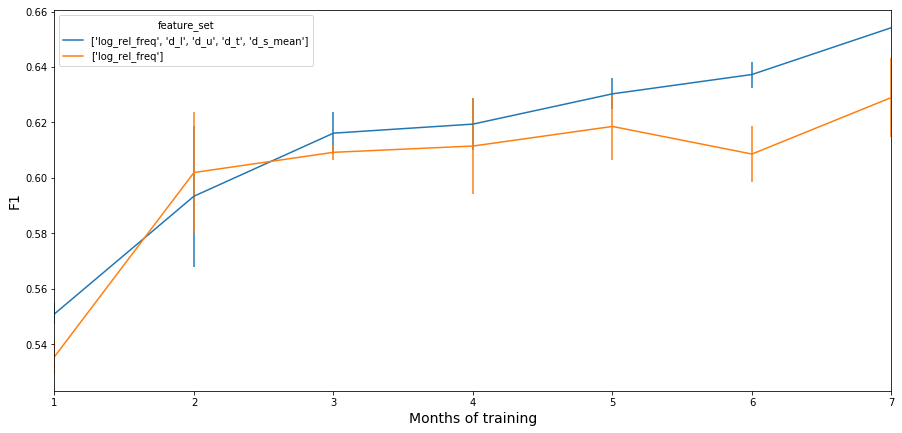

In [355]:
nes_predict = PlotPerformance(nes, my_start, lag_max, clf_choice, f_sets, plt_name='nes_predict.png')